# Grupo 3

Agrupacion Fecha > Categoria > Cantidad (transaction_date, product_category, product_quantity)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as tsa_seasonal
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

warnings.filterwarnings('ignore')

## Carga de datos, limpieza y preprocesamiento

In [2]:
# Cargar data\raw\data_sample.parquet
df = pd.read_parquet('../data/raw/data_sample.parquet')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74457 entries, 0 to 74456
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          74457 non-null  object 
 1   parsed_date               74457 non-null  object 
 2   transaction_id            74457 non-null  object 
 3   transaction_revenue_usd   36744 non-null  float64
 4   transaction_tax_usd       25581 non-null  float64
 5   transaction_shipping_usd  36580 non-null  float64
 6   transaction_affiliation   74457 non-null  object 
 7   currency_code             74457 non-null  object 
 8   product_sku               74457 non-null  object 
 9   product_name              74457 non-null  object 
 10  product_category          74457 non-null  object 
 11  product_brand             74457 non-null  object 
 12  product_variant           74457 non-null  object 
 13  product_quantity          36818 non-null  float64
 14  produc

,transaction_date,parsed_date,transaction_id,transaction_revenue_usd,transaction_tax_usd,transaction_shipping_usd,transaction_affiliation,currency_code,product_sku,product_name,...,is_interaction,is_entrance,is_exit,referer,page_path,hostname,page_title,entrance_page_path,exit_page_path,social_engagement_type
0,20170801,2017-08-01,ORD201708011814,NaN,NaN,NaN,Google Merchandise Store,USD,GGOEGAEJ028013,Google Women's Short Sleeve Hero Tee Grey,...,True,None,True,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged
1,20170801,2017-08-01,ORD201708011814,40.29,8.82,11.0,Google Merchandise Store,USD,GGOEGAEJ028013,Google Women's Short Sleeve Hero Tee Grey,...,True,None,None,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged
2,20170801,2017-08-01,ORD201708011814,NaN,NaN,NaN,Google Merchandise Store,USD,GGOEGALB034113,Google Women's Vintage Hero Tee Black,...,True,None,True,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged
3,20170801,2017-08-01,ORD201708011814,40.29,8.82,11.0,Google Merchandise Store,USD,GGOEGALB034113,Google Women's Vintage Hero Tee Black,...,True,None,None,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged
4,20170801,2017-08-01,ORD201708011814,NaN,NaN,NaN,Google Merchandise Store,USD,GGOEGOCB017499,Leatherette Journal,...,True,None,True,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged


In [3]:
# Convertir la columna 'transaction_date' a tipo datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74457 entries, 0 to 74456
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          74457 non-null  datetime64[ns]
 1   parsed_date               74457 non-null  object        
 2   transaction_id            74457 non-null  object        
 3   transaction_revenue_usd   36744 non-null  float64       
 4   transaction_tax_usd       25581 non-null  float64       
 5   transaction_shipping_usd  36580 non-null  float64       
 6   transaction_affiliation   74457 non-null  object        
 7   currency_code             74457 non-null  object        
 8   product_sku               74457 non-null  object        
 9   product_name              74457 non-null  object        
 10  product_category          74457 non-null  object        
 11  product_brand             74457 non-null  object        
 12  product_variant   

In [5]:
# Mostrar la cantidad de valores nulos en las columnas 'product_category' y 'product_quantity'
print(df['product_category'].isnull().sum())
print(df['product_quantity'].isnull().sum())

0
37639


In [6]:
# Eliminar filas con valores nulos en las columnas 'product_category' y 'product_quantity'
df = df.dropna(subset=['product_category'])
df = df.dropna(subset=['product_quantity'])

In [7]:
# Mostrar la cantidad de valores nulos en las columnas 'product_category' y 'product_quantity'
print(df['product_category'].isnull().sum())
print(df['product_quantity'].isnull().sum())

0
0


In [8]:
# Mostrar los valores de product_category
df["product_category"].value_counts()

product_category
Apparel                               12972
(not set)                              8110
Office                                 5490
Drinkware                              2913
Lifestyle                              2198
Bags                                   1476
Electronics                            1172
Headgear                                594
Notebooks & Journals                    353
Waze                                    279
${productitem.product.origCatName}      278
Bottles                                 207
Gift Cards                              153
Accessories                             148
Housewares                               98
Backpacks                                97
Google                                   95
Fun                                      75
More Bags                                75
Android                                  29
Tumblers                                  6
Name: count, dtype: int64

In [9]:
# Remover todas las filas cuyo 'product_category' es '(not set)'
df = df[df['product_category'] != '(not set)']
df = df[df['product_category'] != '${productitem.product.origCatName}']


In [10]:
# Convertir la columna 'product_quantity' a tipo categórica
df['product_category'] = df['product_category'].astype('category')
# Mostrar la nueva forma del DataFrame
df.shape

(28430, 77)

In [11]:
df["product_category"].value_counts()

product_category
Apparel                 12972
Office                   5490
Drinkware                2913
Lifestyle                2198
Bags                     1476
Electronics              1172
Headgear                  594
Notebooks & Journals      353
Waze                      279
Bottles                   207
Gift Cards                153
Accessories               148
Housewares                 98
Backpacks                  97
Google                     95
More Bags                  75
Fun                        75
Android                    29
Tumblers                    6
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28430 entries, 1 to 58066
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          28430 non-null  datetime64[ns]
 1   parsed_date               28430 non-null  object        
 2   transaction_id            28430 non-null  object        
 3   transaction_revenue_usd   28430 non-null  float64       
 4   transaction_tax_usd       19686 non-null  float64       
 5   transaction_shipping_usd  28273 non-null  float64       
 6   transaction_affiliation   28430 non-null  object        
 7   currency_code             28430 non-null  object        
 8   product_sku               28430 non-null  object        
 9   product_name              28430 non-null  object        
 10  product_category          28430 non-null  category      
 11  product_brand             28430 non-null  object        
 12  product_variant        

In [13]:
def fill_missing_dates_with_zero(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rellena las fechas faltantes con cantidad cero para cada categoría de producto.

    Args:
        df (pd.DataFrame): DataFrame con las columnas 'transaction_date', 'product_category', 'product_quantity'.

    Returns:
        pd.DataFrame: DataFrame con el rango completo de fechas diarias por categoría, días faltantes con cantidad cero.
    """

    # Normalizar a fecha (sin hora) y asegurar tipo numérico
    df['transaction_date'] = df['transaction_date'].dt.normalize()
    df['product_quantity'] = pd.to_numeric(df['product_quantity'], errors='coerce').fillna(0)

    # Relleno por categoría en el rango activo
    filled_frames = []
    for category, g in df.groupby('product_category', observed=True):
        g = g.sort_values('transaction_date')
        start_date = g['transaction_date'].min()
        end_date = g['transaction_date'].max()
        if pd.isna(start_date) or pd.isna(end_date):
            continue

        full_range = pd.date_range(start=start_date, end=end_date, freq='D')

        # Crear serie con índice de fecha y reindexar con 0
        ts = g.set_index('transaction_date')['product_quantity']
        # Asegurar frecuencia diaria antes de reindexar (no introduce NaN aún)
        ts = ts.asfreq('D')
        ts = ts.reindex(full_range, fill_value=0)

        df_cat = pd.DataFrame({
            'transaction_date': ts.index,
            'product_category': category,
            'product_quantity': ts.astype(float).values  # mantener tipo consistente
        })
        filled_frames.append(df_cat)

    if filled_frames:
        df = pd.concat(filled_frames, ignore_index=True)
    else:
        # Si no hubo frames (caso borde), garantizar esquema vacío correcto
        df = df[['transaction_date', 'product_category', 'product_quantity']].copy()

    # Tipos finales y orden
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    # Si es de tipo category originalmente, preservarlo
    try:
        original_dtype = df['product_category'].dtype  # df aún disponible arriba
        df['product_category'] = df['product_category'].astype(original_dtype)
    except Exception:
        pass

    df['product_quantity'] = pd.to_numeric(df['product_quantity'], errors='coerce').fillna(0)
    df = df.sort_values(['product_category', 'transaction_date'])

    return df

## Agrupación y guardado de datos

In [14]:
# Agrupar por 'transaction_date' y 'product_category', sumando 'product_quantity'
df = df.groupby(['transaction_date', 'product_category'], as_index=False, observed=True)['product_quantity'].sum()

df = fill_missing_dates_with_zero(df)

# Crear el folder si no existe
if not os.path.exists('../data/aggregated'):
    os.makedirs('../data/aggregated')

# Guardar el DataFrame agrupado en un archivo Parquet
df.to_parquet('../data/aggregated/day_category.parquet', index=False)
df.head()

# NOTA: El preprocesamiento (limpieza y agrupación) están en src\preprocess\aggregation.py, cleaning.py y preprocessing.py

,transaction_date,product_category,product_quantity
0,2016-10-13,Accessories,1.0
1,2016-10-14,Accessories,0.0
2,2016-10-15,Accessories,0.0
3,2016-10-16,Accessories,3.0
4,2016-10-17,Accessories,0.0


In [15]:
# Cargar el archivo Parquet para verificar
df = pd.read_parquet('../data/aggregated/day_category.parquet')
df['product_category'] = df['product_category'].astype('category')

In [16]:
df.dtypes

transaction_date    datetime64[ns]
product_category          category
product_quantity           float64
dtype: object

In [17]:
df["product_category"].value_counts()

product_category
Apparel                 293
Drinkware               293
Bags                    293
Lifestyle               293
Office                  293
Electronics             293
Headgear                293
Bottles                 292
Backpacks               290
Housewares              288
Accessories             286
Gift Cards              285
Notebooks & Journals    279
Waze                    251
More Bags               220
Google                  214
Android                 204
Fun                     142
Tumblers                 27
Name: count, dtype: int64

## Descomposición temporal para ARIMA

In [18]:
# CONFIGURACIÓN ESTÁNDAR
PERIOD = 7  # Estacionalidad semanal para todas las categorías
MODEL = 'additive'  # Modelo consistente
MIN_ACTIVE_DAYS = 14  # Mínimo de días con ventas para procesar
VISUALIZAR = False # Indica si se desea ver los gráficos de descomposición

# Función para test de estacionariedad
def adf_test(timeseries, title=''):
    """
    Realiza el test de Dickey-Fuller Aumentado
    H0: La serie tiene raíz unitaria (no es estacionaria)
    H1: La serie es estacionaria
    """
    print(f'   📊 Test ADF para {title}:')
    
    # Eliminar valores NaN
    clean_series = timeseries.dropna()
    if len(clean_series) == 0:
        print("   ❌ No hay datos válidos para el test")
        return None
    
    try:
        # Realizar el test
        dftest = adfuller(clean_series, autolag='AIC')
        
        # Interpretación rápida
        p_value = dftest[1]
        adf_stat = dftest[0]
        critical_1 = dftest[4]['1%']
        critical_5 = dftest[4]['5%']
        
        if p_value <= 0.05:
            result = "✅ ESTACIONARIA"
            interpretation = f"p-value ({p_value:.4f}) <= 0.05"
        else:
            result = "❌ NO ESTACIONARIA"
            interpretation = f"p-value ({p_value:.4f}) > 0.05"
        
        print(f"      {result} | ADF: {adf_stat:.3f} | Critical 5%: {critical_5:.3f} | {interpretation}")
        return {'is_stationary': p_value <= 0.05, 'p_value': p_value, 'adf_stat': adf_stat}
        
    except Exception as e:
        print(f"   ❌ Error en test ADF: {e}")
        return None

print("📊 RESUMEN INICIAL:")
print(f"Rango de fechas: {df['transaction_date'].min()} a {df['transaction_date'].max()}")
print(f"Total de días únicos: {df['transaction_date'].nunique()}")
print(f"Total de registros: {len(df)}")

# PASO 1: Ver qué categorías tienes
print(f"\nCategorías disponibles:")
category_stats = df['product_category'].value_counts()
print(category_stats)

# PASO 2: Análisis de actividad por categoría
print(f"\n--- ANÁLISIS DE ACTIVIDAD ---")
categories = df['product_category'].unique()

for category in categories:
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Contar días únicos con ventas
    active_days = df_category['transaction_date'].nunique()
    total_transactions = len(df_category)
    
    # Rango de fechas de esta categoría
    start_date = df_category['transaction_date'].min()
    end_date = df_category['transaction_date'].max()
    potential_days = (end_date - start_date).days + 1
    activity_rate = (active_days / potential_days) * 100
    
    print(f"{category:20} | Días activos: {active_days:3d} | Rango: {potential_days:3d} días | Actividad: {activity_rate:5.1f}% | Registros: {total_transactions}")

# PASO 3: Descomposición con relleno inteligente
print(f"\n--- DESCOMPOSICIÓN (período={PERIOD} días) ---")

for category in categories:
    print(f"\n🔄 Procesando: {category}")
    
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Verificar actividad mínima
    active_days = df_category['transaction_date'].nunique()
    if active_days < MIN_ACTIVE_DAYS:
        print(f"   ❌ Insuficiente actividad ({active_days} días activos < {MIN_ACTIVE_DAYS}). Saltando...")
        continue
    
    # Agrupar por fecha (sumar cantidades del mismo día)
    ts = df_category.groupby('transaction_date')['product_quantity'].sum().sort_index()

    total_days = len(ts)
    print(f"   📅 Fechas observadas: {total_days} días con ventas registradas")

    #
    # print(f"   📅 Rango: {start_date.date()} a {end_date.date()} ({total_days} días)")
    # print(f"   📈 Días con ventas: {total_days - zero_days} | Días sin ventas: {zero_days}")
    #
    # Verificar que hay suficientes datos para el período elegido
    if total_days < 2 * PERIOD:
        print(f"   ⚠️  Advertencia: Solo {total_days} días para período de {PERIOD}. Continuando...")
    
    # TEST DE ESTACIONARIEDAD
    print(f"   🔬 TESTS DE ESTACIONARIEDAD:")
    adf_original = adf_test(ts, 'Serie Original')
    
    # Descomponer
    try:
        decomposition = tsa_seasonal.seasonal_decompose(ts, period=PERIOD, model=MODEL)
        
        # Tests adicionales en componentes
        adf_trend = adf_test(decomposition.trend, 'Tendencia')
        adf_residual = adf_test(decomposition.resid, 'Residuos')
        adf_diff = adf_test(ts.diff().dropna(), 'Diferenciada')

        if VISUALIZAR:
            # Visualizar
            fig, axes = plt.subplots(4, 1, figsize=(14, 10))

            # Serie original
            ts.plot(ax=axes[0], title=f'{category} - Serie Original', color='blue', alpha=0.8)
            axes[0].set_ylabel('Cantidad')
            axes[0].grid(True, alpha=0.3)

            # Tendencia
            decomposition.trend.plot(ax=axes[1], title='Tendencia', color='red', linewidth=2)
            axes[1].set_ylabel('Tendencia')
            axes[1].grid(True, alpha=0.3)

            # Estacionalidad
            decomposition.seasonal.plot(ax=axes[2], title=f'Estacionalidad (período = {PERIOD} días)', color='green')
            axes[2].set_ylabel('Estacional')
            axes[2].grid(True, alpha=0.3)

            # Residuos
            decomposition.resid.plot(ax=axes[3], title='Residuos', color='orange', alpha=0.7)
            axes[3].set_ylabel('Residuos')
            axes[3].set_xlabel('Fecha')
            axes[3].grid(True, alpha=0.3)

            plt.suptitle(f'Descomposición Temporal - {category}', size=16, y=0.98)
            plt.tight_layout()
            plt.show()
        
        # Estadísticas adicionales
        trend_slope = decomposition.trend.dropna().iloc[-1] - decomposition.trend.dropna().iloc[0]
        seasonal_amplitude = decomposition.seasonal.max() - decomposition.seasonal.min()
        
        print(f"   ✅ Procesado correctamente")
        print(f"   📊 Tendencia general: {'📈 Creciente' if trend_slope > 0 else '📉 Decreciente' if trend_slope < 0 else '➡️  Estable'}")
        print(f"   🔄 Amplitud estacional: {seasonal_amplitude:.1f} unidades")
        
        # RECOMENDACIONES BASADAS EN ESTACIONARIEDAD
        print(f"   💡 RECOMENDACIONES:")
        if adf_original and not adf_original['is_stationary']:
            print(f"      • Serie original NO estacionaria → Considera diferenciación")
            print(f"      • Para predicción: Usa modelos ARIMA con diferenciación")
        else:
            print(f"      • Serie original estacionaria → Apta para modelado directo")
        
        if adf_residual and adf_residual['is_stationary']:
            print(f"      • Residuos estacionarios → Buena descomposición")
        elif adf_residual:
            print(f"      • Residuos NO estacionarios → Revisa modelo o período")

        if adf_diff and not adf_diff['is_stationary']:
            print(f"      • Serie diferenciada NO estacionaria → Podría necesitar más diferenciación o transformación")
        elif adf_diff:
            print(f"      • Serie diferenciada estacionaria → Diferenciación adecuada")
        
    except Exception as e:
        print(f"   ❌ Error: {e}")

print("\n🎉 Análisis completado!")
print(f"\n💡 CONFIGURACIÓN USADA:")
print(f"   • Período estacional: {PERIOD} días ({'mensual' if PERIOD == 30 else 'semanal' if PERIOD == 7 else 'personalizado'})")
print(f"   • Modelo: {MODEL}")
print(f"   • Relleno: 0s en días sin ventas (solo rango activo por categoría)")

📊 RESUMEN INICIAL:
Rango de fechas: 2016-10-13 00:00:00 a 2017-08-01 00:00:00
Total de días únicos: 293
Total de registros: 4829

Categorías disponibles:
product_category
Apparel                 293
Drinkware               293
Bags                    293
Lifestyle               293
Office                  293
Electronics             293
Headgear                293
Bottles                 292
Backpacks               290
Housewares              288
Accessories             286
Gift Cards              285
Notebooks & Journals    279
Waze                    251
More Bags               220
Google                  214
Android                 204
Fun                     142
Tumblers                 27
Name: count, dtype: int64

--- ANÁLISIS DE ACTIVIDAD ---
Accessories          | Días activos: 286 | Rango: 286 días | Actividad: 100.0% | Registros: 286
Android              | Días activos: 204 | Rango: 204 días | Actividad: 100.0% | Registros: 204
Apparel              | Días activos: 293 | Rango

In [19]:
MIN_ACTIVE_DAYS = 30  # Mínimo de días para modelar

def preparar_serie_categoria(df, category):
    """
    Prepara la serie temporal para una categoría específica
    """
    # Filtrar categoría
    df_category = df[df['product_category'] == category].copy()
    
    # Verificar datos suficientes
    active_days = df_category['transaction_date'].nunique()
    if active_days < MIN_ACTIVE_DAYS:
        return None, f"Pocos datos: {active_days} días"
    
    # Agrupar por fecha y sumar cantidades
    ts_data = df_category.groupby('transaction_date')['product_quantity'].sum()
    
    # Relleno inteligente (solo rango activo)
    start_date = ts_data.index.min()
    end_date = ts_data.index.max()
    full_date_range = pd.date_range(start_date, end_date, freq='D')
    ts = ts_data.reindex(full_date_range, fill_value=0)
    
    return ts, "OK"

def pacf_con_recomendacion(serie, show_graph = True, lags=20, titulo=""):
    """
    PACF con interpretación automática para sugerir p (orden AR).
    Criterio solicitado:
      - Recomendar p como el ÚLTIMO lag que está fuera del intervalo de confianza (el último que “sale” del rango).
      - Si ninguno sale, p = 0.
    Retorna:
      dict con lags_significativos, ultimo_significativo y p_sugerido.
    """
    from statsmodels.tsa.stattools import pacf as sm_pacf
    from statsmodels.graphics.tsaplots import plot_pacf

    # Calcular PACF con intervalos de confianza
    pacf_vals, confint = sm_pacf(serie, nlags=lags, alpha=0.05, method="ywm")

    # Determinar significancia por lag (ignora lag 0)
    # Un lag es significativo si 0 NO cae dentro del intervalo
    significativos = []
    for i in range(1, len(pacf_vals)):
        lower, upper = confint[i]
        is_sig = not (lower <= 0.0 <= upper)
        if is_sig:
            significativos.append(i)

    # p sugerido: último lag significativo (último que sale del rango)
    p_sugerido = significativos[-1] if len(significativos) > 0 else 0

    # Graficar
    if show_graph:
        plt.figure(figsize=(12, 6))
        plot_pacf(serie, lags=lags, alpha=0.05, method="ywm")
        plt.title(f'PACF con p (AR) sugerido - {titulo}')
        plt.grid(True, alpha=0.3)

        # Marcar último significativo
        if p_sugerido > 0:
            plt.axvline(x=p_sugerido, color='red', linestyle='--', alpha=0.9, label=f'p sugerido: {p_sugerido}')
        plt.legend(loc='best')
        plt.show()

    # Resumen
    print(f"📊 INTERPRETACIÓN PACF - {titulo}")
    print("="*50)
    print(f"Lags significativos: {significativos if significativos else 'Ninguno'}")
    print(f"Orden AR sugerido (p): {p_sugerido}")

    return {
        'lags_significativos': significativos,
        'ultimo_significativo': p_sugerido if p_sugerido > 0 else None,
        'p_sugerido': p_sugerido
    }

def acf_con_recomendacion(serie, show_graph = True, lags=20, titulo=""):
    """
    ACF con interpretación automática para sugerir q (orden MA).
    Lógica:
      - Calcula ACF y sus intervalos de confianza al 95%.
      - Identifica el primer lag que entra en el rango no significativo (donde 0 cae dentro del IC).
      - Recomienda q = (lag_no_significativo - 1).
      - Si todos los lags hasta 'lags' son significativos, recomienda el último lag significativo continuo.
    Retorna:
      dict con lags_significativos, primer_no_significativo y q_sugerido.
    """
    from statsmodels.tsa.stattools import acf as sm_acf
    from statsmodels.graphics.tsaplots import plot_acf

    # Calcular ACF con intervalos de confianza
    acf_vals, confint = sm_acf(serie, nlags=lags, alpha=0.05, fft=True)

    # Determinar significancia por lag (ignora lag 0)
    # Una barra es significativa si 0 NO está dentro del IC.
    sig = []
    for i in range(1, len(acf_vals)):
        lower, upper = confint[i]
        is_sig = not (lower <= 0.0 <= upper)
        sig.append(is_sig)

    # Primer lag no significativo
    first_non_sig = None
    for i, is_sig in enumerate(sig, start=1):
        if not is_sig:
            first_non_sig = i
            break

    # q sugerido
    if first_non_sig is not None:
        q_sugerido = max(0, first_non_sig - 1)
    else:
        # todos significativos hasta 'lags' → usar la racha inicial continua
        q_sugerido = 0
        for i, is_sig in enumerate(sig, start=1):
            if is_sig:
                q_sugerido = i
            else:
                break

    # Graficar
    if show_graph:
        plt.figure(figsize=(12, 6))
        plot_acf(serie, lags=lags, alpha=0.05)
        plt.title(f'ACF con q (MA) sugerido - {titulo}')
        plt.grid(True, alpha=0.3)

        # Marcar cortes
        if first_non_sig is not None:
            plt.axvline(x=first_non_sig, color='orange', linestyle='--', alpha=0.8, label=f'Primer no significativo: {first_non_sig}')
        if q_sugerido is not None:
            plt.axvline(x=q_sugerido, color='red', linestyle='--', alpha=0.9, label=f'q sugerido: {q_sugerido}')
        plt.legend(loc='best')
        plt.show()

    # Resumen
    lags_significativos = [i for i, v in enumerate(sig, start=1) if v]
    print(f"📊 INTERPRETACIÓN ACF - {titulo}")
    print("="*50)
    print(f"Lags significativos: {lags_significativos}")
    if first_non_sig is not None:
        print(f"Primer lag no significativo: {first_non_sig}")
    else:
        print("No se detectó lag no significativo dentro del rango evaluado")
    print(f"Orden MA sugerido (q): {q_sugerido}")

    return {
        'lags_significativos': lags_significativos,
        'primer_no_significativo': first_non_sig,
        'q_sugerido': q_sugerido
    }

def estimar_todas_categorias(df, categorias_especificas=None):
    """
    Ejecuta análisis ARIMA para todas las categorías
    """
    print("🎯 INICIANDO ESTIMACION DE q Y p")
    print("=" * 60)

    # Determinar qué categorías analizar
    if categorias_especificas:
        categories = categorias_especificas
    else:
        # Solo categorías con suficientes datos
        categories = []
        for cat in df['product_category'].unique():
            active_days = df[df['product_category'] == cat]['transaction_date'].nunique()
            if active_days >= MIN_ACTIVE_DAYS:
                categories.append(cat)

        print(f"📋 Categorías con suficientes datos ({MIN_ACTIVE_DAYS}+ días): {len(categories)}")
        for cat in categories:
            active_days = df[df['product_category'] == cat]['transaction_date'].nunique()
            print(f"   • {cat}: {active_days} días")

    # Ejecutar análisis
    resultados = {}

    for category in categories:
        dts, mensaje = preparar_serie_categoria(df, category)
        resultado_p = pacf_con_recomendacion(dts, False, lags = 30, titulo = category)
        resultado_q = acf_con_recomendacion(dts, False, lags = 30, titulo= category)

        resultados[category] = {
            'category': category,
            'resultado_p': resultado_p,  # dict
            'resultado_q': resultado_q,  # dict
        }


    return resultados

# Usar las funciones
#dts, mensaje = preparar_serie_categoria(df, 'Accessories')
#pacf_results = pacf_con_recomendacion(dts, lags=30, titulo="Serie - Accessories")
#acf_results = acf_con_recomendacion(dts, lags=30, titulo="Serie - Accessories")

resultados_estimacion = estimar_todas_categorias(df)


arima_componentes_recomendados = []
for category, datos in resultados_estimacion.items():
    p = datos['resultado_p'].get('p_sugerido', None)
    q = datos['resultado_q'].get('q_sugerido', None)
    arima_componentes_recomendados.append({'category': category, 'p': p, 'q': q})

df_resultados_estimacion = pd.DataFrame(arima_componentes_recomendados, columns=['category', 'p', 'q'])
df_resultados_estimacion


🎯 INICIANDO ESTIMACION DE q Y p
📋 Categorías con suficientes datos (30+ días): 18
   • Accessories: 286 días
   • Android: 204 días
   • Apparel: 293 días
   • Backpacks: 290 días
   • Bags: 293 días
   • Bottles: 292 días
   • Drinkware: 293 días
   • Electronics: 293 días
   • Fun: 142 días
   • Gift Cards: 285 días
   • Google: 214 días
   • Headgear: 293 días
   • Housewares: 288 días
   • Lifestyle: 293 días
   • More Bags: 220 días
   • Notebooks & Journals: 279 días
   • Office: 293 días
   • Waze: 251 días
📊 INTERPRETACIÓN PACF - Accessories
Lags significativos: [1, 21, 22]
Orden AR sugerido (p): 22
📊 INTERPRETACIÓN ACF - Accessories
Lags significativos: [1, 21, 22]
Primer lag no significativo: 2
Orden MA sugerido (q): 1
📊 INTERPRETACIÓN PACF - Android
Lags significativos: [13, 18]
Orden AR sugerido (p): 18
📊 INTERPRETACIÓN ACF - Android
Lags significativos: []
Primer lag no significativo: 1
Orden MA sugerido (q): 0
📊 INTERPRETACIÓN PACF - Apparel
Lags significativos: [1, 11, 1

,category,p,q
0,Accessories,22,1
1,Android,18,0
2,Apparel,29,1
3,Backpacks,26,0
4,Bags,0,0
5,Bottles,28,0
6,Drinkware,21,1
7,Electronics,7,0
8,Fun,0,0
9,Gift Cards,23,0


**Verificacion de una categoría específica para ver las gráficas**

<Figure size 1200x600 with 0 Axes>

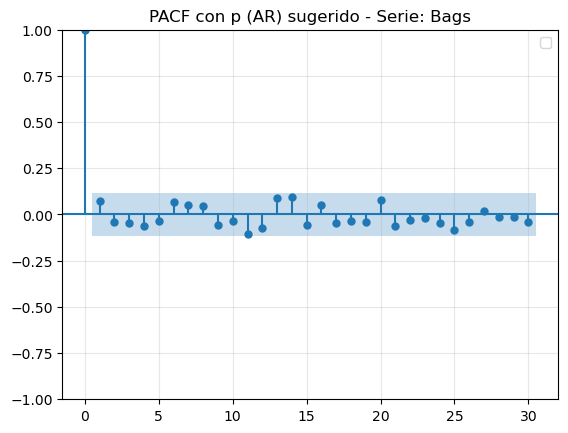

📊 INTERPRETACIÓN PACF - Serie: Bags
Lags significativos: Ninguno
Orden AR sugerido (p): 0


<Figure size 1200x600 with 0 Axes>

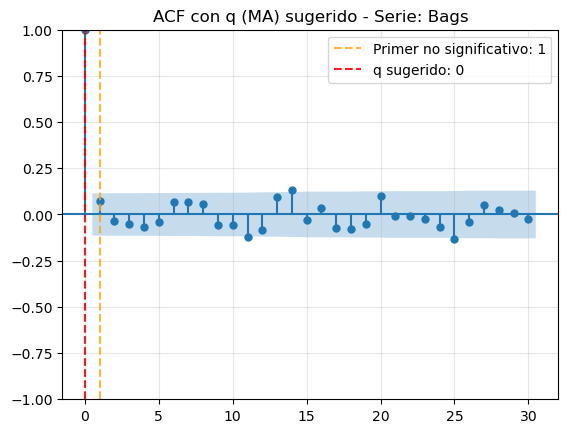

📊 INTERPRETACIÓN ACF - Serie: Bags
Lags significativos: [11, 14, 25]
Primer lag no significativo: 1
Orden MA sugerido (q): 0


In [20]:
dts, mensaje = preparar_serie_categoria(df, 'Bags')
pacf_results = pacf_con_recomendacion(dts, lags=30, titulo="Serie: Bags")
acf_results = acf_con_recomendacion(dts, lags=30, titulo="Serie: Bags")

## Busqueda del mejor modelo ARIMA y evaluación

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

TRAIN_SPLIT = 0.8      # 80% para entrenamiento, 20% para prueba

def encontrar_mejor_arima(ts, max_p=3, max_d=2, max_q=3):
    """
    Busca los mejores parámetros ARIMA usando AIC
    """
    import random
    search_id = random.randint(1000, 9999)
    print(f"   🔍 Buscando mejores parámetros ARIMA... [ID: {search_id}]")
    
    mejor_aic = float('inf')
    mejor_orden = None
    mejor_modelo = None
    resultados = []
    
    for p in range(0, max_p + 1):
        for d in range(0, max_d + 1):
            for q in range(0, max_q + 1):
                try:
                    modelo = ARIMA(ts, order=(p, d, q))
                    modelo_ajustado = modelo.fit()
                    
                    aic = modelo_ajustado.aic
                    resultados.append({
                        'orden': (p, d, q),
                        'aic': aic,
                        'bic': modelo_ajustado.bic
                    })
                    
                    if aic < mejor_aic:
                        mejor_aic = aic
                        mejor_orden = (p, d, q)
                        mejor_modelo = modelo_ajustado
                        
                except Exception as e:
                    continue
    
    # SOLO reportar que se encontró, SIN métricas
    if mejor_modelo:
        print(f"   ✅ Modelo óptimo encontrado: ARIMA{mejor_orden} [ID: {search_id}]")
    else:
        print(f"   ❌ No se encontró modelo válido [ID: {search_id}]")
    
    return mejor_modelo, mejor_orden, resultados

def encontrar_mejor_arima_with_range(ts, min_p=0, max_p=3, min_d=0, max_d=2, min_q=0, max_q=3):
    """
    Busca los mejores parámetros ARIMA usando AIC
    """
    import random
    search_id = random.randint(1000, 9999)
    print(f"   🔍 Buscando mejores parámetros ARIMA... [ID: {search_id}]")

    mejor_aic = float('inf')
    mejor_orden = None
    mejor_modelo = None
    resultados = []

    for p in range(min_p, max_p):
        for d in range(min_d, max_d):
            for q in range(min_q, max_q):
                try:
                    modelo = ARIMA(ts, order=(p, d, q))
                    modelo_ajustado = modelo.fit()

                    aic = modelo_ajustado.aic
                    resultados.append({
                        'orden': (p, d, q),
                        'aic': aic,
                        'bic': modelo_ajustado.bic
                    })

                    if aic < mejor_aic:
                        mejor_aic = aic
                        mejor_orden = (p, d, q)
                        mejor_modelo = modelo_ajustado

                except Exception as e:
                    continue

    # SOLO reportar que se encontró, SIN métricas
    if mejor_modelo:
        print(f"   ✅ Modelo óptimo encontrado: ARIMA{mejor_orden} [ID: {search_id}]")
    else:
        print(f"   ❌ No se encontró modelo válido [ID: {search_id}]")

    return mejor_modelo, mejor_orden, resultados

def crear_modelo_arima(serie, orden=(1,1,1)):
    """
    Crea y ajusta un modelo ARIMA
    orden = (p, d, q) donde:
    p = orden AR (autoregresivo)
    d = orden de diferenciación
    q = orden MA (media móvil)
    """

    resultados = []

    print(f"🔧 Creando modelo ARIMA{orden}")
    
    # Crear el modelo
    modelo = ARIMA(serie, order=orden)
    
    # Ajustar el modelo
    modelo_ajustado = modelo.fit()

    resultados.append({
        'orden': orden,
        'aic': modelo_ajustado.aic,
        'bic': modelo_ajustado.bic
    })
    
    # Mostrar resumen
    print(modelo_ajustado.summary())
    
    return modelo_ajustado, orden, resultados

def evaluar_modelo(modelo, ts_test, ts_train, pasos_forecast):
    """
    Evalúa el modelo ARIMA con métricas de error
    """
    try:
        # Predicción
        forecast = modelo.forecast(steps=pasos_forecast)
        
        # Calcular errores solo donde hay datos de prueba
        min_len = min(len(forecast), len(ts_test))
        forecast_eval = forecast[:min_len]
        test_eval = ts_test[:min_len]
        
        # Métricas de error
        mae = mean_absolute_error(test_eval, forecast_eval)
        rmse = np.sqrt(mean_squared_error(test_eval, forecast_eval))
        mape = np.mean(np.abs((test_eval - forecast_eval) / (test_eval + 1))) * 100  # +1 evita división por 0
        
        return {
            'forecast': forecast,
            'mae': mae,
            'rmse': rmse,
            'mape': mape
        }
    except Exception as e:
        return {'error': str(e)}

def min_non_negative(a, b):
    candidates = [x for x in (a, b) if x >= 0]
    return min(candidates) if candidates else None

def crear_modelo_arima_categoria(df, category, show_graphs=True, auto_arima=True, orden_manual=None):
    """
    Crea modelo ARIMA para una categoría específica
    """
    import random
    exec_id = random.randint(1000, 9999)
    print(f"\n🚀 MODELANDO CATEGORÍA: {category} [ID: {exec_id}]")
    print("-" * 50)
    
    # Preparar datos
    ts, status = preparar_serie_categoria(df, category)
    if ts is None:
        print(f"   ❌ {status}")
        return None
    
    print(f"   📊 Datos: {len(ts)} días ({ts.index.min().date()} a {ts.index.max().date()})")
    
    # Dividir en entrenamiento y prueba
    split_index = int(len(ts) * TRAIN_SPLIT)
    ts_train = ts.iloc[:split_index]
    ts_test = ts.iloc[split_index:]
    
    print(f"   📚 Entrenamiento: {len(ts_train)} días | 🧪 Prueba: {len(ts_test)} días")
    
    # Encontrar mejor modelo o usar manual
    if auto_arima:
        if orden_manual:
            modelo, mejor_orden, todos_resultados = encontrar_mejor_arima_with_range(ts_train,
                 min_p=min_non_negative(orden_manual[0]-2, orden_manual[0]),
                 max_p=orden_manual[0]+2,
                 min_d=min_non_negative(orden_manual[1]-2, orden_manual[1]),
                 max_d=orden_manual[1]+2,
                 min_q=min_non_negative(orden_manual[2]-2, orden_manual[2]),
                 max_q=orden_manual[2]+2)
        else:
            modelo, mejor_orden, todos_resultados = encontrar_mejor_arima(ts_train)

        if modelo is None:
            print("   ❌ No se pudo crear modelo")
            return None
    else:
        print(f"   🔧 Usando orden manual: ARIMA{orden_manual}")
        try:
            modelo_arima = ARIMA(ts_train, order=orden_manual)
            modelo = modelo_arima.fit()
            mejor_orden = orden_manual
        except Exception as e:
            print(f"   ❌ Error con orden manual: {e}")
            return None
    
    # Evaluar modelo
    evaluacion = evaluar_modelo(modelo, ts_test, ts_train, len(ts_test))
    
    if 'error' in evaluacion:
        print(f"   ❌ Error en evaluación: {evaluacion['error']}")
        return None
    
    # Mostrar resultados - UNA SOLA VEZ
    print(f"   📈 MÉTRICAS DE EVALUACIÓN [ID: {exec_id}]:")
    print(f"      • Modelo: ARIMA{mejor_orden}")
    print(f"      • AIC: {modelo.aic:.2f}")
    print(f"      • MAE: {evaluacion['mae']:.2f}")
    print(f"      • RMSE: {evaluacion['rmse']:.2f}")
    print(f"      • MAPE: {evaluacion['mape']:.2f}%")
    
    # Visualizar
    if show_graphs:
        plt.figure(figsize=(14, 8))
        
        # Plot 1: Serie completa con predicción
        plt.subplot(2, 2, 1)
        ts_train.plot(label='Entrenamiento', alpha=0.8)
        ts_test.plot(label='Datos Reales', color='green', alpha=0.8)
        
        # Agregar predicción
        forecast_index = pd.date_range(start=ts_test.index[0], periods=len(evaluacion['forecast']), freq='D')
        pd.Series(evaluacion['forecast'], index=forecast_index).plot(label='Predicción', color='red', linestyle='--')
        
        plt.title(f'{category} - ARIMA{mejor_orden}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Residuos
        plt.subplot(2, 2, 2)
        residuos = modelo.resid
        residuos.plot(title='Residuos del Modelo', alpha=0.7)
        plt.grid(True, alpha=0.3)
        
        # Plot 3: ACF de residuos
        plt.subplot(2, 2, 3)
        plot_acf(residuos.dropna(), ax=plt.gca(), title='ACF Residuos', lags=20)
        
        # Plot 4: Distribución de residuos
        plt.subplot(2, 2, 4)
        residuos.hist(bins=20, alpha=0.7)
        plt.title('Distribución de Residuos')
        plt.xlabel('Residuos')
        plt.ylabel('Frecuencia')
        
        plt.tight_layout()
        plt.show()
    else:
        residuos = modelo.resid

    
    # Test de autocorrelación de residuos (Ljung-Box)
    try:
        ljung_box = acorr_ljungbox(residuos.dropna(), lags=10, return_df=True)
        p_value_min = ljung_box['lb_pvalue'].min()
        
        if p_value_min > 0.05:
            print(f"   ✅ Test Ljung-Box: p-value mínimo = {p_value_min:.4f} > 0.05 (Residuos OK)")
        else:
            print(f"   ⚠️  Test Ljung-Box: p-value mínimo = {p_value_min:.4f} <= 0.05 (Posible autocorrelación)")
    except:
        print(f"   ⚠️  No se pudo realizar test Ljung-Box")
    
    return {
        'modelo': modelo,
        'orden': mejor_orden,
        'evaluacion': evaluacion,
        'ts_train': ts_train,
        'ts_test': ts_test,
        'category': category
    }

def analizar_todas_categorias(df, auto_arima=True, categorias_especificas=None):
    """
    Ejecuta análisis ARIMA para todas las categorías
    """
    print("🎯 INICIANDO ANÁLISIS ARIMA MULTI-CATEGORÍA")
    print("=" * 60)
    
    # Determinar qué categorías analizar
    if categorias_especificas:
        categories = categorias_especificas
    else:
        # Solo categorías con suficientes datos
        categories = []
        for cat in df['product_category'].unique():
            active_days = df[df['product_category'] == cat]['transaction_date'].nunique()
            if active_days >= MIN_ACTIVE_DAYS:
                categories.append(cat)
        
        print(f"📋 Categorías con suficientes datos ({MIN_ACTIVE_DAYS}+ días): {len(categories)}")
        for cat in categories:
            active_days = df[df['product_category'] == cat]['transaction_date'].nunique()
            print(f"   • {cat}: {active_days} días")
    
    # Ejecutar análisis
    resultados = {}
    
    for category in categories:
        resultado = crear_modelo_arima_categoria(df, category, False, auto_arima=auto_arima)
        if resultado:
            resultados[category] = resultado
    
    # Resumen final
    print(f"\n📊 RESUMEN FINAL:")
    print("=" * 60)
    print(f"Categorías procesadas exitosamente: {len(resultados)}")
    
    if resultados:
        # Ranking por MAPE
        ranking = sorted(resultados.items(), key=lambda x: x[1]['evaluacion']['mape'])
        
        print(f"\n🏆 RANKING POR PRECISIÓN (MAPE):")
        for i, (cat, res) in enumerate(ranking, 1):
            mape = res['evaluacion']['mape']
            orden = res['orden']
            print(f"{i:2d}. {cat:20} | ARIMA{orden} | MAPE: {mape:6.2f}%")
    
    return resultados



**Pruebas de modelado para una categoría específica para ver como funcionan las funciones de auto-arima y comparar sus resultados**


🚀 MODELANDO CATEGORÍA: Accessories [ID: 3832]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔧 Usando orden manual: ARIMA(22, 0, 1)
   📈 MÉTRICAS DE EVALUACIÓN [ID: 3832]:
      • Modelo: ARIMA(22, 0, 1)
      • AIC: 1305.18
      • MAE: 1.45
      • RMSE: 5.32
      • MAPE: 74.89%


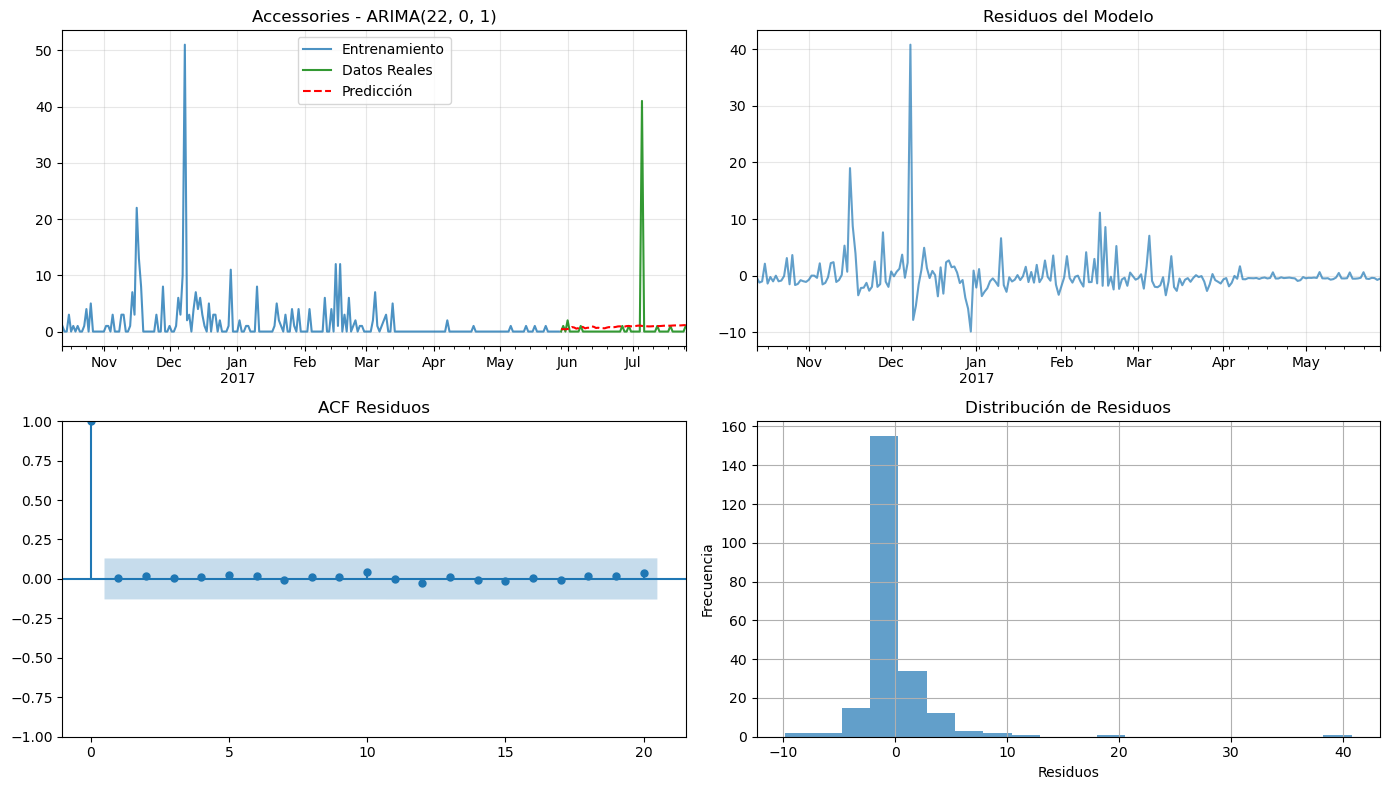

   ✅ Test Ljung-Box: p-value mínimo = 0.9439 > 0.05 (Residuos OK)

🚀 MODELANDO CATEGORÍA: Accessories [ID: 6319]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔧 Usando orden manual: ARIMA(22, 1, 1)
   📈 MÉTRICAS DE EVALUACIÓN [ID: 6319]:
      • Modelo: ARIMA(22, 1, 1)
      • AIC: 1302.64
      • MAE: 0.95
      • RMSE: 5.38
      • MAPE: 18.35%


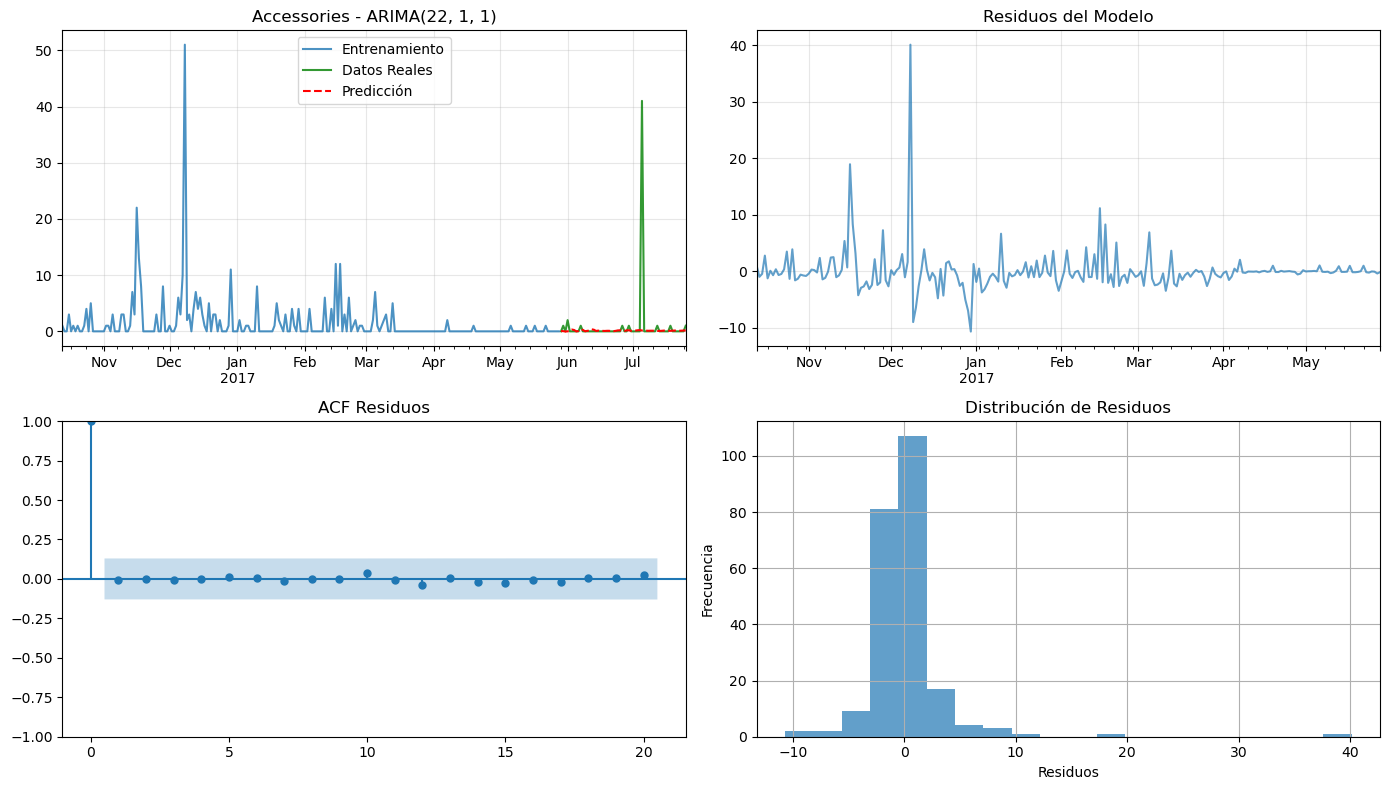

   ✅ Test Ljung-Box: p-value mínimo = 0.9395 > 0.05 (Residuos OK)

🚀 MODELANDO CATEGORÍA: Accessories [ID: 6366]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔧 Usando orden manual: ARIMA(21, 1, 1)
   📈 MÉTRICAS DE EVALUACIÓN [ID: 6366]:
      • Modelo: ARIMA(21, 1, 1)
      • AIC: 1300.77
      • MAE: 0.95
      • RMSE: 5.38
      • MAPE: 18.47%


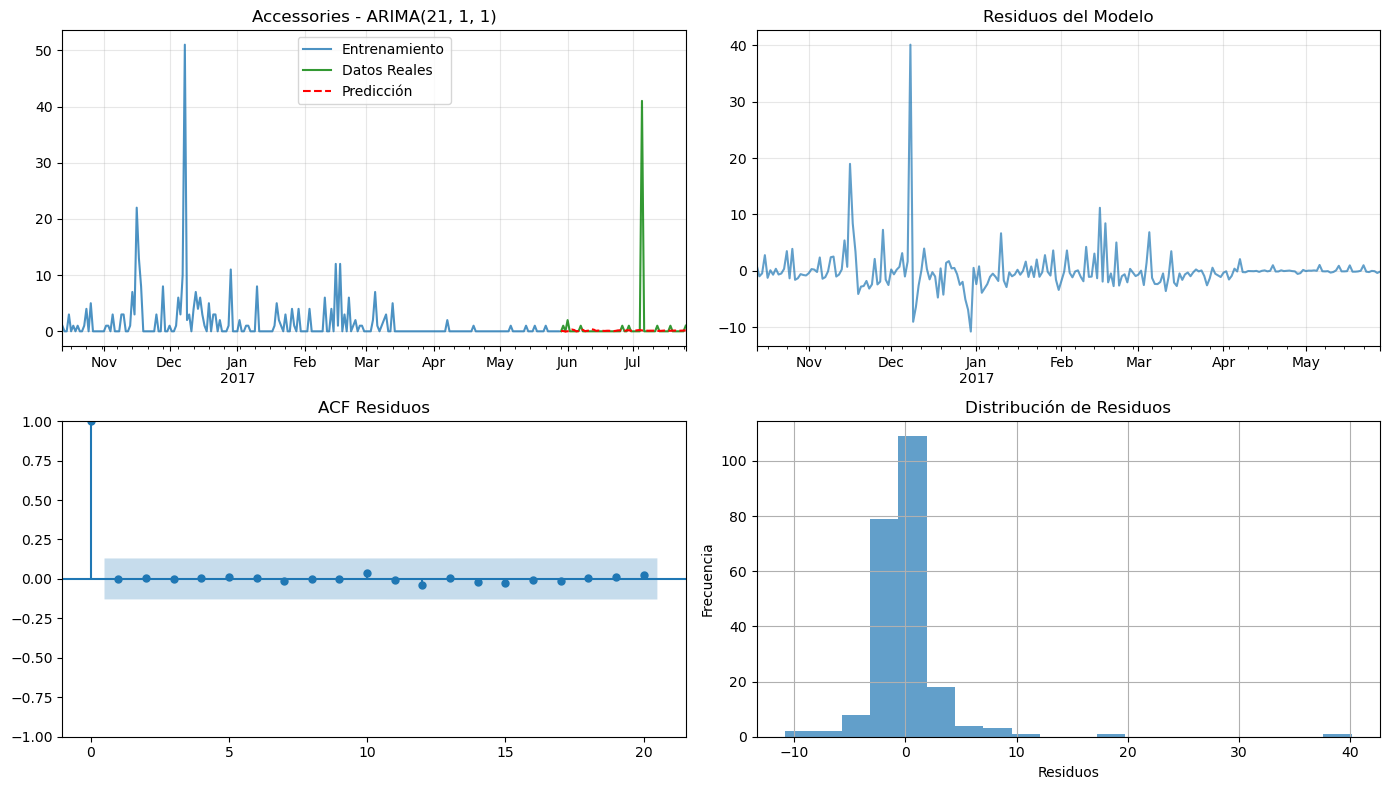

   ✅ Test Ljung-Box: p-value mínimo = 0.9763 > 0.05 (Residuos OK)

🚀 MODELANDO CATEGORÍA: Accessories [ID: 8718]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔧 Usando orden manual: ARIMA(21, 0, 1)
   📈 MÉTRICAS DE EVALUACIÓN [ID: 8718]:
      • Modelo: ARIMA(21, 0, 1)
      • AIC: 1308.42
      • MAE: 1.44
      • RMSE: 5.32
      • MAPE: 73.72%


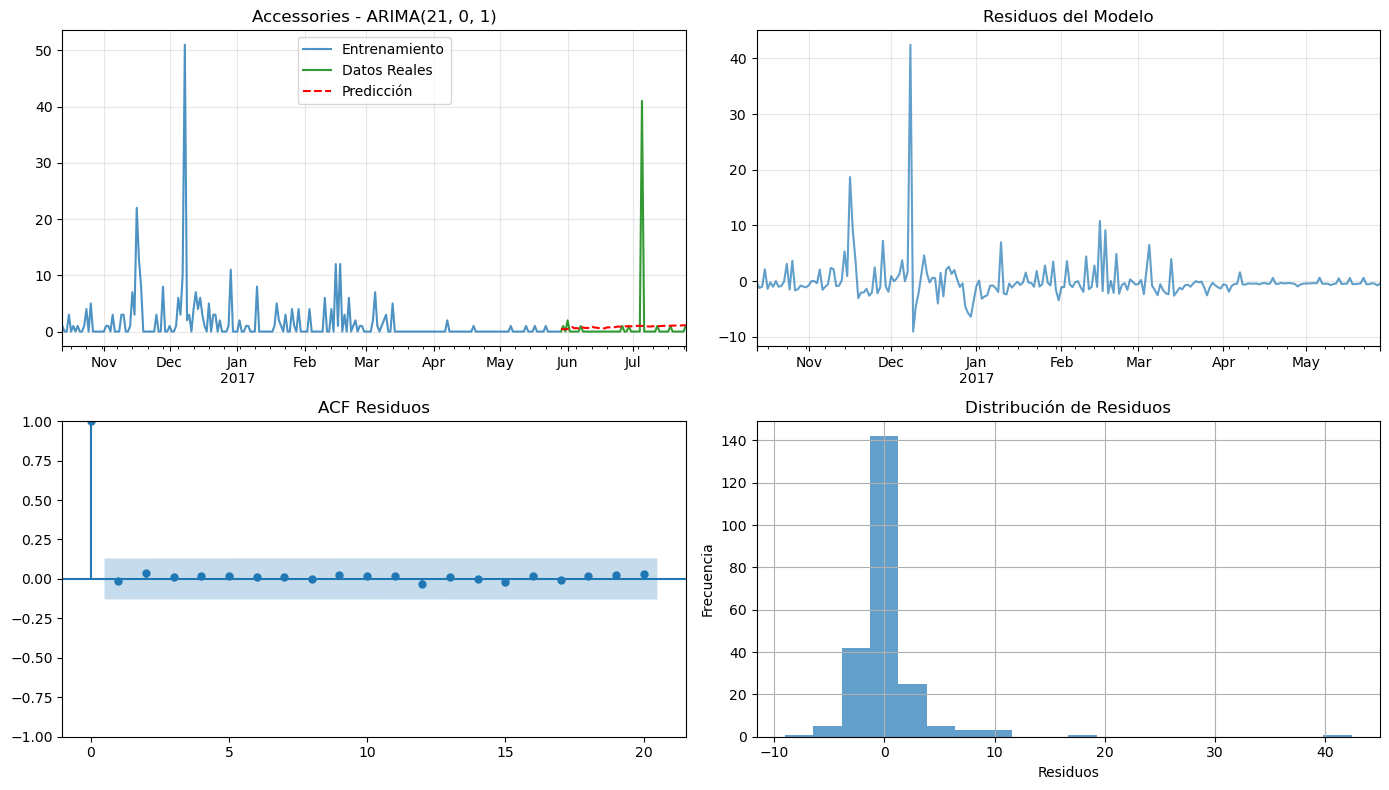

   ✅ Test Ljung-Box: p-value mínimo = 0.8387 > 0.05 (Residuos OK)

🚀 MODELANDO CATEGORÍA: Accessories [ID: 6878]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔍 Buscando mejores parámetros ARIMA... [ID: 3088]
   ✅ Modelo óptimo encontrado: ARIMA(0, 1, 3) [ID: 3088]
   📈 MÉTRICAS DE EVALUACIÓN [ID: 6878]:
      • Modelo: ARIMA(0, 1, 3)
      • AIC: 1300.07
      • MAE: 1.05
      • RMSE: 5.36
      • MAPE: 29.90%


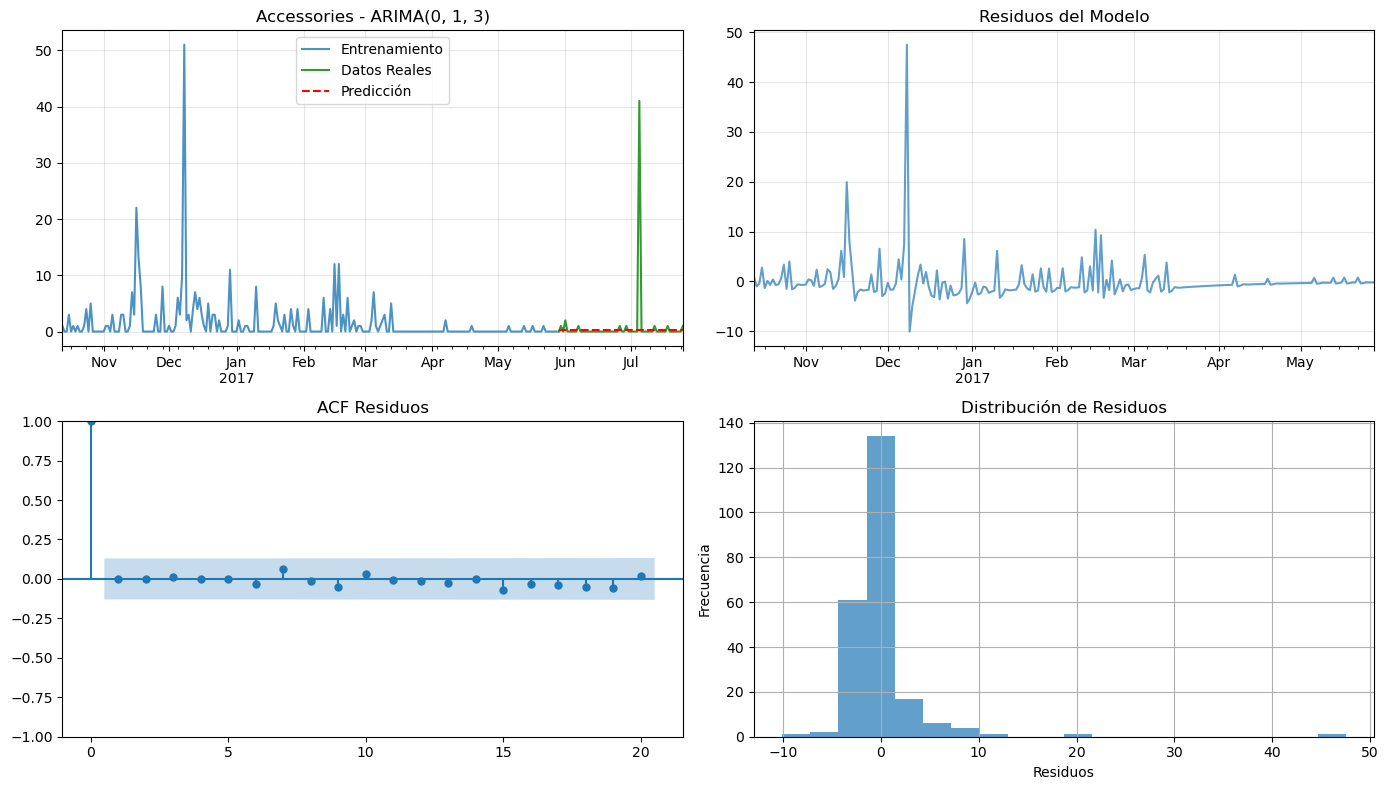

   ✅ Test Ljung-Box: p-value mínimo = 0.9675 > 0.05 (Residuos OK)

🚀 MODELANDO CATEGORÍA: Accessories [ID: 3288]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔍 Buscando mejores parámetros ARIMA... [ID: 8858]
   ✅ Modelo óptimo encontrado: ARIMA(21, 1, 1) [ID: 8858]
   📈 MÉTRICAS DE EVALUACIÓN [ID: 3288]:
      • Modelo: ARIMA(21, 1, 1)
      • AIC: 1300.77
      • MAE: 0.95
      • RMSE: 5.38
      • MAPE: 18.47%


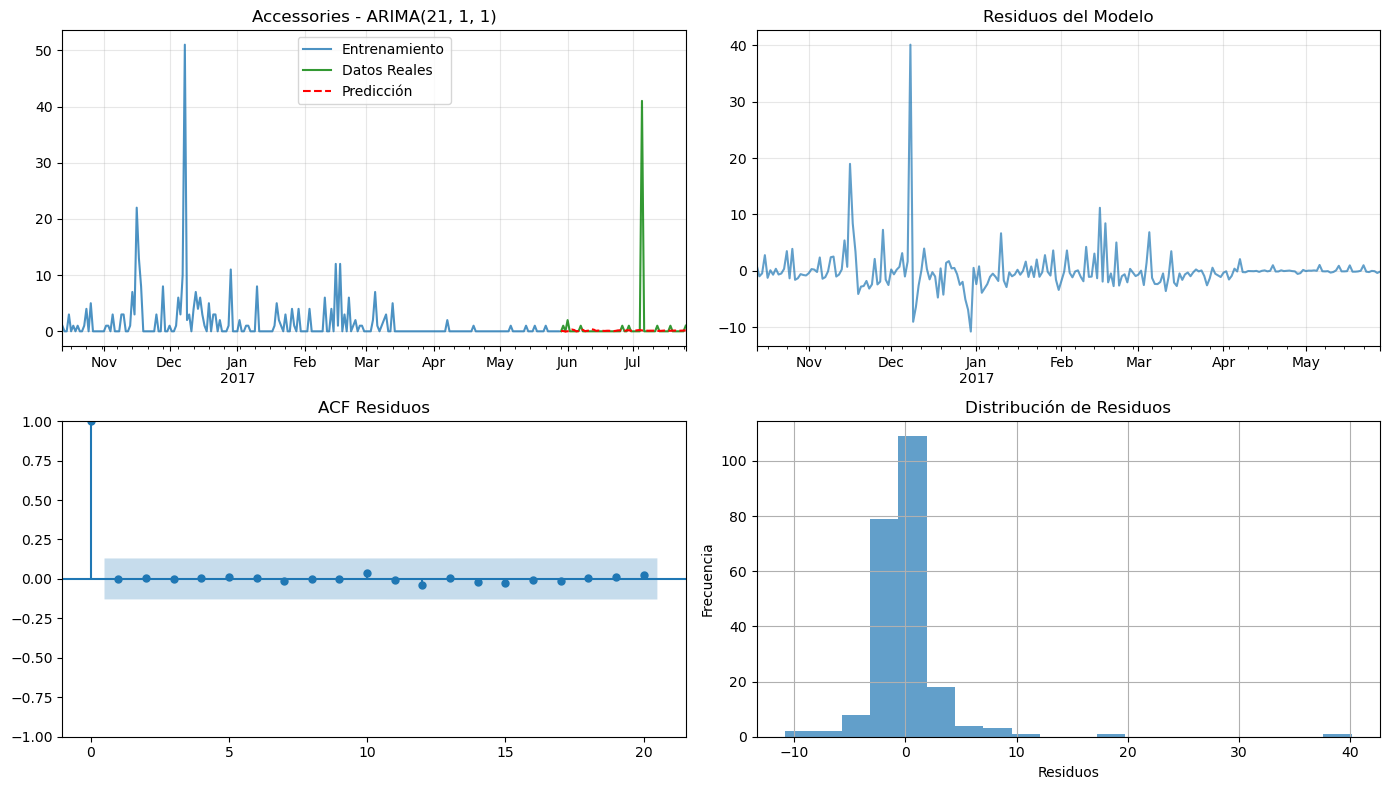

   ✅ Test Ljung-Box: p-value mínimo = 0.9763 > 0.05 (Residuos OK)


In [22]:
# resultados = analizar_todas_categorias(df)
# resultados

# Provar "Accessories" parar compara la recomendacion con la prediccion automatica simple
# Recomendacion 22,0,1
resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=False, orden_manual=(22,0,1))
# Ajuste 1
resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=False, orden_manual=(22,1,1))
# Ajuste 2
resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=False, orden_manual=(21,1,1))
# Ajuste 3
resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=False, orden_manual=(21,0,1))
# Auto-Arima Basico
resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=True)
# Auto-Arima Basico con orden manual basado en recomendacion inicial
resultado = crear_modelo_arima_categoria(df, 'Accessories', auto_arima=True, orden_manual=(22,0,1))


**Por cada categoria, buscar el mejor ARIMA usando los valores recomendados por ACF y PACF**

In [23]:
# hacer un loop sobre df_resultados_estimacion y poder cada columna en una variable (category, p, q)

# Validación básica
required_cols = {'category', 'p', 'q'}
if not required_cols.issubset(df_resultados_estimacion.columns):
    raise ValueError(f"df_resultados_estimacion debe contener las columnas: {required_cols}")

# Loop y asignación a variables
for _, row in df_resultados_estimacion.iterrows():
    category = row['category']
    p = int(row['p']) if not pd.isna(row['p']) else None
    q = int(row['q']) if not pd.isna(row['q']) else None

    # Aquí puedes usar las variables category, p, q
    print(f"Buscando mejor orden para '{category}' con valores centrales de p={p}, d=0, q={q}")

    resultado = crear_modelo_arima_categoria(df, category, show_graphs=False, auto_arima=True, orden_manual=(p,0,q))


Buscando mejor orden para 'Accessories' con valores centrales de p=22, d=0, q=1

🚀 MODELANDO CATEGORÍA: Accessories [ID: 9179]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔍 Buscando mejores parámetros ARIMA... [ID: 7659]
   ✅ Modelo óptimo encontrado: ARIMA(21, 1, 1) [ID: 7659]
   📈 MÉTRICAS DE EVALUACIÓN [ID: 9179]:
      • Modelo: ARIMA(21, 1, 1)
      • AIC: 1300.77
      • MAE: 0.95
      • RMSE: 5.38
      • MAPE: 18.47%
   ✅ Test Ljung-Box: p-value mínimo = 0.9763 > 0.05 (Residuos OK)
Buscando mejor orden para 'Android' con valores centrales de p=18, d=0, q=0

🚀 MODELANDO CATEGORÍA: Android [ID: 9952]
--------------------------------------------------
   📊 Datos: 204 días (2016-12-29 a 2017-07-20)
   📚 Entrenamiento: 163 días | 🧪 Prueba: 41 días
   🔍 Buscando mejores parámetros ARIMA... [ID: 2629]
   ✅ Modelo óptimo encontrado: ARIMA(16, 0, 0) [ID: 2629]
   📈 MÉTRICAS DE EVAL

**Por cada categoria, buscar el mejor ARIMA usando los valores genericos (p,d,q entre 0 y 3)**

In [24]:
# Buscar el mejor ARIMA por cada Categoria usando valores genericos de p, d, q.

# Loop y asignación a variables
for _, row in df_resultados_estimacion.iterrows():
    category = row['category']

    # Aquí puedes usar las variables category, p, q
    print(f"Buscando el mejor orden para '{category}' usando rangos genericos")

    resultado = crear_modelo_arima_categoria(df, category, show_graphs=False, auto_arima=True)


Buscando el mejor orden para 'Accessories' usando rangos genericos

🚀 MODELANDO CATEGORÍA: Accessories [ID: 5575]
--------------------------------------------------
   📊 Datos: 286 días (2016-10-13 a 2017-07-25)
   📚 Entrenamiento: 228 días | 🧪 Prueba: 58 días
   🔍 Buscando mejores parámetros ARIMA... [ID: 3997]
   ✅ Modelo óptimo encontrado: ARIMA(0, 1, 3) [ID: 3997]
   📈 MÉTRICAS DE EVALUACIÓN [ID: 5575]:
      • Modelo: ARIMA(0, 1, 3)
      • AIC: 1300.07
      • MAE: 1.05
      • RMSE: 5.36
      • MAPE: 29.90%
   ✅ Test Ljung-Box: p-value mínimo = 0.9675 > 0.05 (Residuos OK)
Buscando el mejor orden para 'Android' usando rangos genericos

🚀 MODELANDO CATEGORÍA: Android [ID: 4968]
--------------------------------------------------
   📊 Datos: 204 días (2016-12-29 a 2017-07-20)
   📚 Entrenamiento: 163 días | 🧪 Prueba: 41 días
   🔍 Buscando mejores parámetros ARIMA... [ID: 6144]
   ✅ Modelo óptimo encontrado: ARIMA(2, 0, 2) [ID: 6144]
   📈 MÉTRICAS DE EVALUACIÓN [ID: 4968]:
      • Mo

## Resultados ARIMA

Anteriormente se han realizado 2 pruebas principales, y estos son los resultados:

1. **Recomendado usando PACF y ACF como valores centrales**: Se usaron los valores sugeridos por los análisis de PACF y ACF para definir los parámetros (p, d, q) de los modelos ARIMA. Estos valores se usanron como valores "centrales" y se ajustaron ligeramente para mejorar el rendimiento.

| Categoría            | p  | d | q | AIC     | MAE    | RMSE   | MAPE     |
| -------------------- | -- | - | - | ------- | ------ | ------ | -------- |
| Accessories          | 21 | 1 | 1 | 1300.77 | 0.95   | 5.38   | 18.47%   |
| Android              | 16 | 0 | 0 | 149.02  | 0.36   | 0.57   | 22.44%   |
| Apparel              | 27 | 1 | 1 | 2775.17 | 66.58  | 124.69 | 129.33%  |
| Backpacks            | 25 | 1 | 0 | 820.54  | 0.63   | 0.76   | 55.33%   |
| Bags                 | 1  | 1 | 1 | 2702.77 | 51.12  | 98.96  | 693.17%  |
| Bottles              | 27 | 1 | 0 | 1937.72 | 10.48  | 14.82  | 481.77%  |
| Drinkware            | 20 | 1 | 1 | 2884.78 | 72.69  | 124.24 | 513.85%  |
| Electronics          | 7  | 1 | 1 | 2719.67 | 26.91  | 35.81  | 595.49%  |
| Fun                  | 0  | 1 | 1 | 1039.47 | 6.53   | 18.12  | 217.80%  |
| Gift Cards           | 22 | 1 | 0 | 1087.27 | 1.36   | 1.66   | 104.62%  |
| Google               | 15 | 1 | 1 | 1229.54 | 4.94   | 10.51  | 198.48%  |
| Headgear             | 29 | 1 | 0 | 2373.73 | 4.31   | 9.59   | 114.82%  |
| Housewares           | 26 | 1 | 0 | 2108.82 | 17.19  | 82.22  | 371.28%  |
| Lifestyle            | 26 | 1 | 1 | 2850.72 | 73.10  | 126.17 | 609.75%  |
| More Bags            | 25 | 0 | 0 | 1034.82 | 1.09   | 1.52   | 74.48%   |
| Notebooks & Journals | 12 | 1 | 0 | 2449.97 | 50.55  | 187.42 | 436.04%  |
| Office               | 7  | 1 | 1 | 3403.32 | 222.78 | 309.41 | 1037.84% |
| Waze                 | 6  | 1 | 1 | 1624.50 | 3.00   | 4.21   | 207.89%  |

2. **Recomendado usando valores genéricos (p,d,q entre 0 y 3)**: Se realizó una búsqueda dentro de un rango genérico para encontrar los mejores parámetros (p, d, q) para cada categoría. Este enfoque permitió identificar combinaciones que optimizan las métricas de error y compararlas con los resultados anteriores.


| Categoría            | p | d | q | AIC     | MAE    | RMSE   | MAPE    |
| -------------------- | - | - | - | ------- | ------ | ------ | ------- |
| Accessories          | 0 | 1 | 3 | 1300.07 | 1.05   | 5.36   | 29.90%  |
| Android              | 2 | 0 | 2 | 136.86  | 0.35   | 0.58   | 21.67%  |
| Apparel              | 0 | 1 | 2 | 2765.53 | 65.71  | 125.23 | 126.68% |
| Backpacks            | 2 | 1 | 3 | 803.85  | 0.61   | 0.73   | 51.77%  |
| Bags                 | 2 | 1 | 3 | 2694.55 | 48.06  | 95.66  | 485.58% |
| Bottles              | 1 | 1 | 2 | 1940.82 | 9.02   | 12.80  | 361.95% |
| Drinkware            | 2 | 1 | 3 | 2868.72 | 74.72  | 121.42 | 503.59% |
| Electronics          | 0 | 1 | 2 | 2713.26 | 27.01  | 35.89  | 598.09% |
| Fun                  | 0 | 1 | 1 | 1039.47 | 6.53   | 18.12  | 217.80% |
| Gift Cards           | 0 | 0 | 0 | 1063.16 | 0.97   | 1.48   | 58.89%  |
| Google               | 3 | 1 | 3 | 1215.79 | 5.11   | 10.53  | 201.51% |
| Headgear             | 0 | 1 | 1 | 2323.40 | 5.78   | 9.57   | 219.10% |
| Housewares           | 0 | 1 | 1 | 2091.83 | 18.25  | 82.38  | 440.45% |
| Lifestyle            | 2 | 0 | 3 | 2829.33 | 77.19  | 128.27 | 571.54% |
| More Bags            | 0 | 0 | 0 | 991.94  | 1.11   | 1.59   | 75.03%  |
| Notebooks & Journals | 3 | 1 | 3 | 2476.92 | 52.65  | 186.74 | 677.04% |
| Office               | 2 | 1 | 3 | 3382.58 | 212.46 | 290.72 | 783.64% |
| Waze                 | 0 | 1 | 1 | 1612.95 | 2.99   | 4.21   | 207.08% |

Finalmente, se compararon ambos enfoques y se seleccionaron los mejores modelos para cada categoría. A continuación se presentan los parámetros (p, d, q) finales seleccionados para cada categoría.

**Mejores valores encontrados**

| Categoría            | p  | d | q | AIC     | MAE    | RMSE   | MAPE    |
| -------------------- | -- | - | - | ------- | ------ | ------ | ------- |
| Accessories          | 21 | 1 | 1 | 1300.77 | 0.95   | 5.38   | 18.47%  |
| Android              | 2  | 0 | 2 | 136.86  | 0.35   | 0.58   | 21.67%  |
| Apparel              | 0  | 1 | 2 | 2765.53 | 65.71  | 125.23 | 126.68% |
| Backpacks            | 2  | 1 | 3 | 803.85  | 0.61   | 0.73   | 51.77%  |
| Bags                 | 2  | 1 | 3 | 2694.55 | 48.06  | 95.66  | 485.58% |
| Bottles              | 1  | 1 | 2 | 1940.82 | 9.02   | 12.80  | 361.95% |
| Drinkware            | 2  | 1 | 3 | 2868.72 | 74.72  | 121.42 | 503.59% |
| Electronics          | 0  | 1 | 2 | 2713.26 | 27.01  | 35.89  | 598.09% |
| Fun                  | 0  | 1 | 1 | 1039.47 | 6.53   | 18.12  | 217.80% |
| Gift Cards           | 0  | 0 | 0 | 1063.16 | 0.97   | 1.48   | 58.89%  |
| Google               | 15 | 1 | 1 | 1229.54 | 4.94   | 10.51  | 198.48% |
| Headgear             | 29 | 1 | 0 | 2373.73 | 4.31   | 9.59   | 114.82% |
| Housewares           | 26 | 1 | 0 | 2108.82 | 17.19  | 82.22  | 371.28% |
| Lifestyle            | 2  | 0 | 3 | 2829.33 | 77.19  | 128.27 | 571.54% |
| More Bags            | 25 | 0 | 0 | 1034.82 | 1.09   | 1.52   | 74.48%  |
| Notebooks & Journals | 12 | 1 | 0 | 2449.97 | 50.55  | 187.42 | 436.04% |
| Office               | 2  | 1 | 3 | 3382.58 | 212.46 | 290.72 | 783.64% |
| Waze                 | 0  | 1 | 1 | 1612.95 | 2.99   | 4.21   | 207.08% |



In [25]:
# Reconstruccion de los mejores modelos ARIMA para cada categoria

arima_models_config = {
    "product_category": [
        "Accessories", "Android", "Apparel", "Backpacks", "Bags", "Bottles", "Drinkware",
        "Electronics", "Fun", "Gift Cards", "Google", "Headgear", "Housewares", "Lifestyle",
        "More Bags", "Notebooks & Journals", "Office", "Waze"
    ],
    "p": [21, 2, 0, 2, 2, 1, 2, 0, 0, 0, 15, 29, 26, 2, 25, 12, 2, 0],
    "d": [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
    "q": [1, 2, 2, 3, 3, 2, 3, 2, 1, 0, 1, 0, 0, 3, 0, 0, 3, 1]
}

df_arima_models_config = pd.DataFrame(arima_models_config)
# configura la columna product_category como category
df_arima_models_config['product_category'] = df_arima_models_config['product_category'].astype('category')

df_arima_models_config


,product_category,p,d,q
0,Accessories,21,1,1
1,Android,2,0,2
2,Apparel,0,1,2
3,Backpacks,2,1,3
4,Bags,2,1,3
5,Bottles,1,1,2
6,Drinkware,2,1,3
7,Electronics,0,1,2
8,Fun,0,1,1
9,Gift Cards,0,0,0


## Segundo Modelo de Prueba - Machine Learning


In [26]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split



In [27]:
# ============================
# Preprocesamiento inicial Machine Learning
# ============================

# Filtrar una categoría de producto (ejemplo: "Accessories")
df_cat = df[df["product_category"] == "Accessories"].copy()

# Agrupar por fecha
df_cat = df_cat.groupby("transaction_date")["product_quantity"].sum().reset_index()

# Convertir a datetime y usar como índice
df_cat["transaction_date"] = pd.to_datetime(df_cat["transaction_date"])
df_cat = df_cat.set_index("transaction_date")

# Crear lags
for lag in [1, 2, 7, 14]:
    df_cat[f"lag_{lag}"] = df_cat["product_quantity"].shift(lag)

# Variables de calendario
df_cat["day_of_week"] = df_cat.index.dayofweek
df_cat["month"] = df_cat.index.month

# Eliminar NaN generados por los lags
df_cat = df_cat.dropna()

# Ahora sí: Features (X) y Target (y)
X = df_cat.drop(columns=["product_quantity"])
y = df_cat["product_quantity"]

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("Features:", X.columns)


Shape X: (272, 6)
Shape y: (272,)
Features: Index(['lag_1', 'lag_2', 'lag_7', 'lag_14', 'day_of_week', 'month'], dtype='object')


In [28]:
df_cat

,product_quantity,lag_1,lag_2,lag_7,lag_14,day_of_week,month
transaction_date,,,,,,,
2016-10-27,0.0,5.0,0.0,1.0,1.0,3,10
2016-10-28,0.0,0.0,5.0,0.0,0.0,4,10
2016-10-29,0.0,0.0,0.0,0.0,0.0,5,10
2016-10-30,0.0,0.0,0.0,1.0,3.0,6,10
2016-10-31,0.0,0.0,0.0,4.0,0.0,0,10
...,...,...,...,...,...,...,...
2017-07-21,0.0,0.0,0.0,0.0,0.0,4,7
2017-07-22,0.0,0.0,0.0,0.0,0.0,5,7
2017-07-23,0.0,0.0,0.0,0.0,0.0,6,7


In [29]:
# Dividir en train/test (80/20) usando el X, y del preprocesamiento inicial
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

## Modelo Random Forest

In [30]:
# ---------------------------
# Random Forest
# ---------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mape_rf = np.mean(np.abs((y_test - rf_pred) / (y_test + 1))) * 100

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, MAPE: {mape_rf:.2f}%")

Random Forest - MAE: 1.33, RMSE: 5.70, MAPE: 55.02%


## Pruebas gráficas de predicción vs realidad

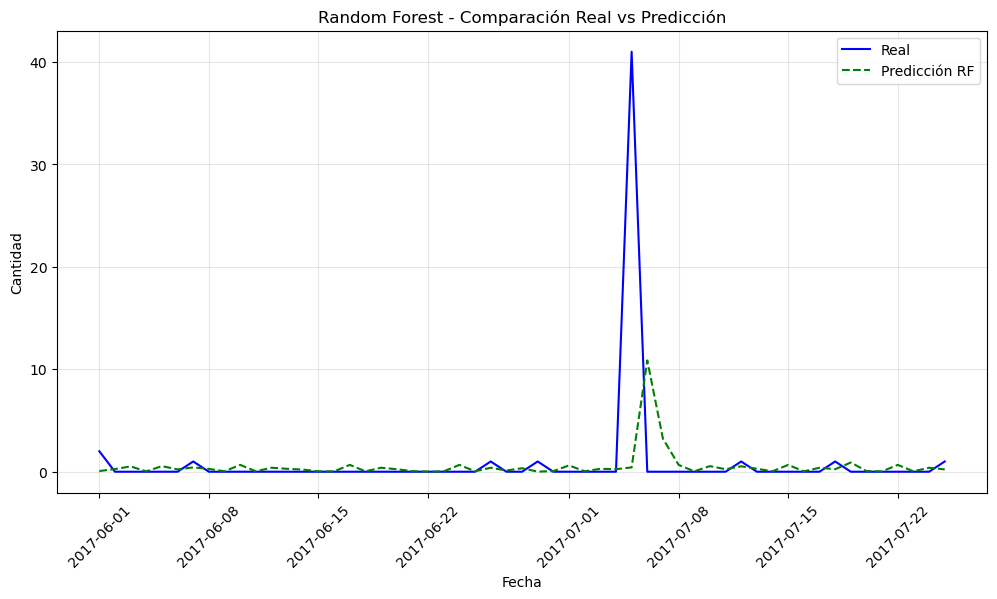

In [31]:
# Random Forest
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label="Real", color="blue")
plt.plot(y_test.index, rf_pred, label="Predicción RF", color="green", linestyle="--")
plt.title("Random Forest - Comparación Real vs Predicción")
plt.xlabel("Fecha"); plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()


## Optimizando los Hiperparametros

In [32]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

In [33]:
# Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=5)

In [34]:
# Random Forest optimizado
param_grid_rf = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

rf_opt = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=tscv,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1
)

rf_opt.fit(X_train, y_train)
print("Mejores parámetros RF:", rf_opt.best_params_)

rf_pred_opt = rf_opt.predict(X_test)

mae_rf_opt = mean_absolute_error(y_test, rf_pred_opt)
rmse_rf_opt = np.sqrt(mean_squared_error(y_test, rf_pred_opt))
mape_rf_opt = np.mean(np.abs((y_test - rf_pred_opt) / (y_test + 1))) * 100

print(f"Random Forest OPT - MAE: {mae_rf_opt:.2f}, RMSE: {rmse_rf_opt:.2f}, MAPE: {mape_rf_opt:.2f}%")


Mejores parámetros RF: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 10}
Random Forest OPT - MAE: 1.24, RMSE: 5.60, MAPE: 45.68%


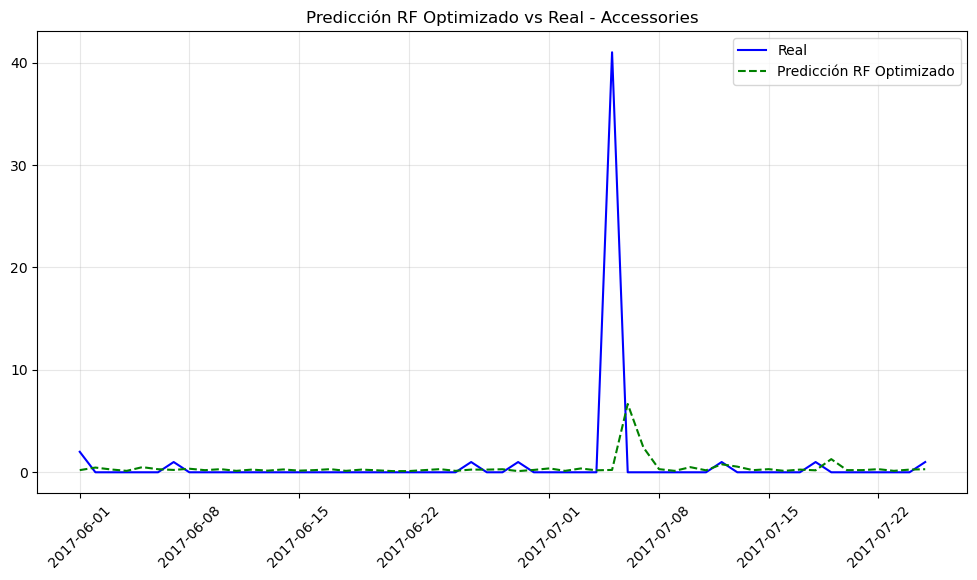

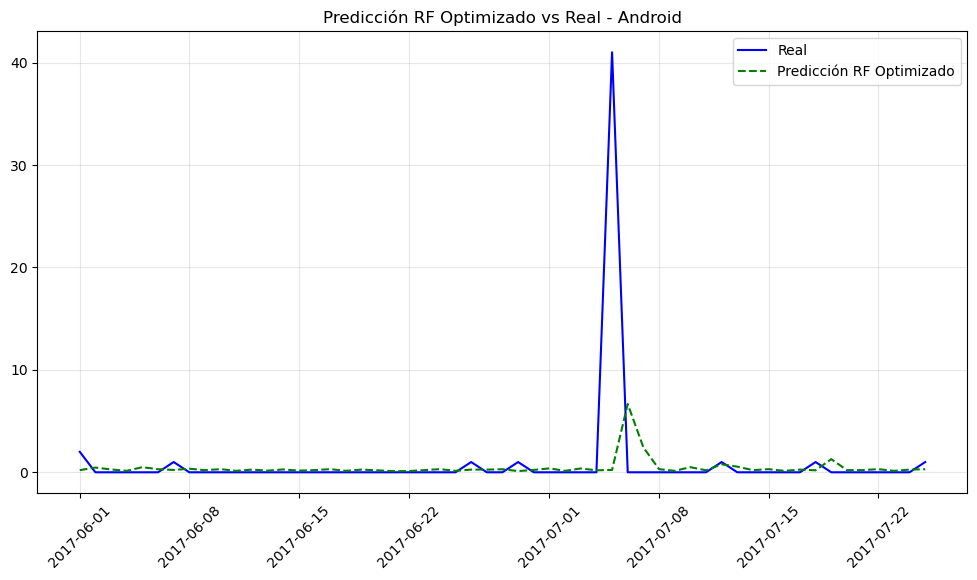

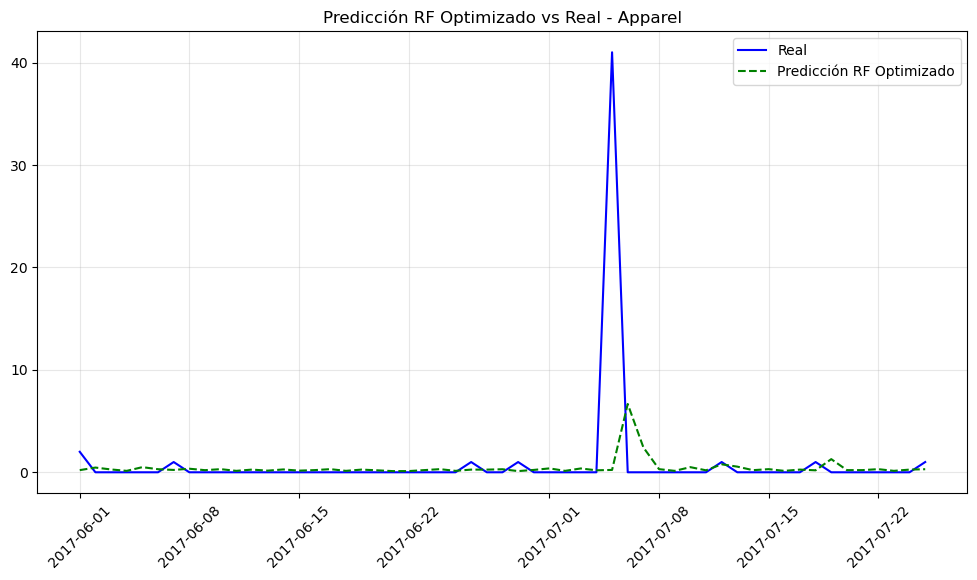

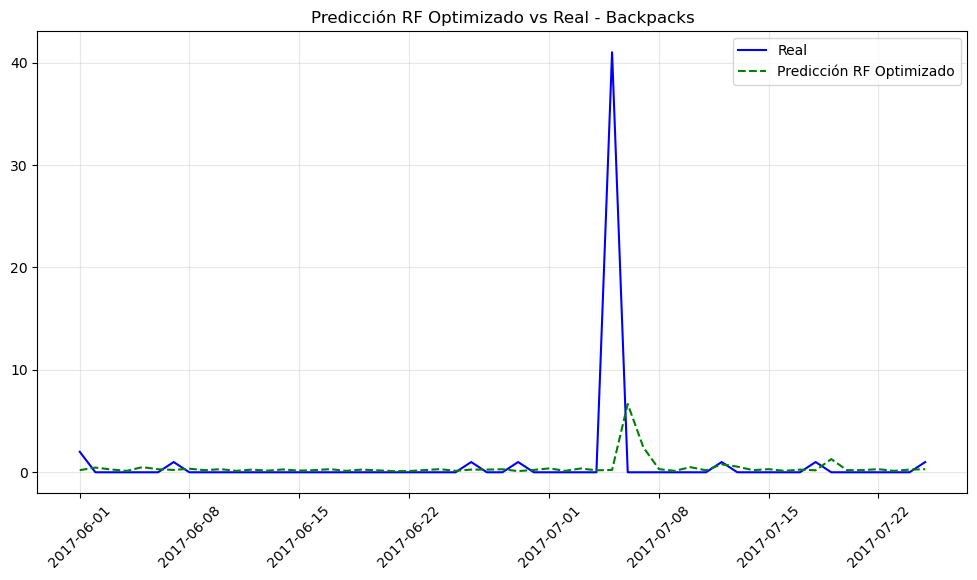

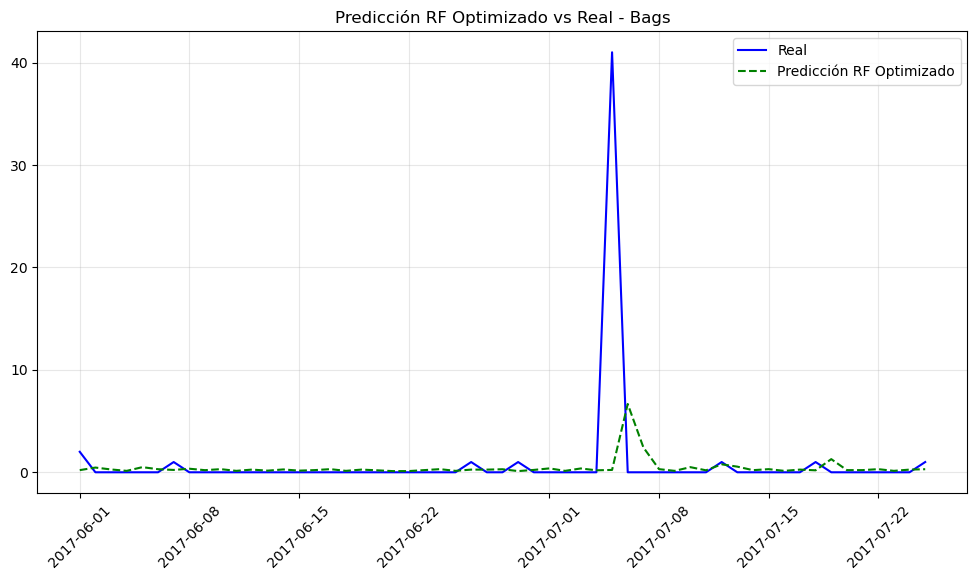

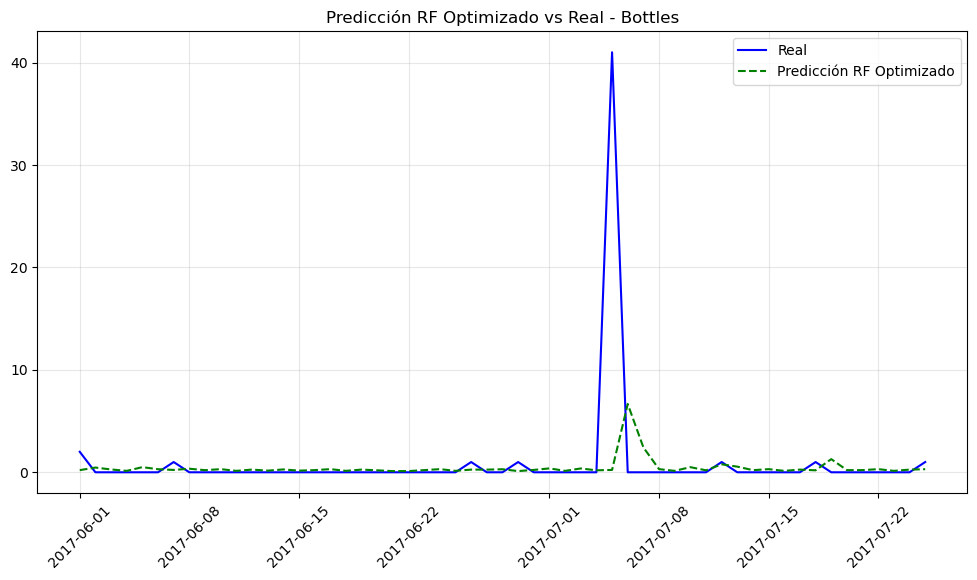

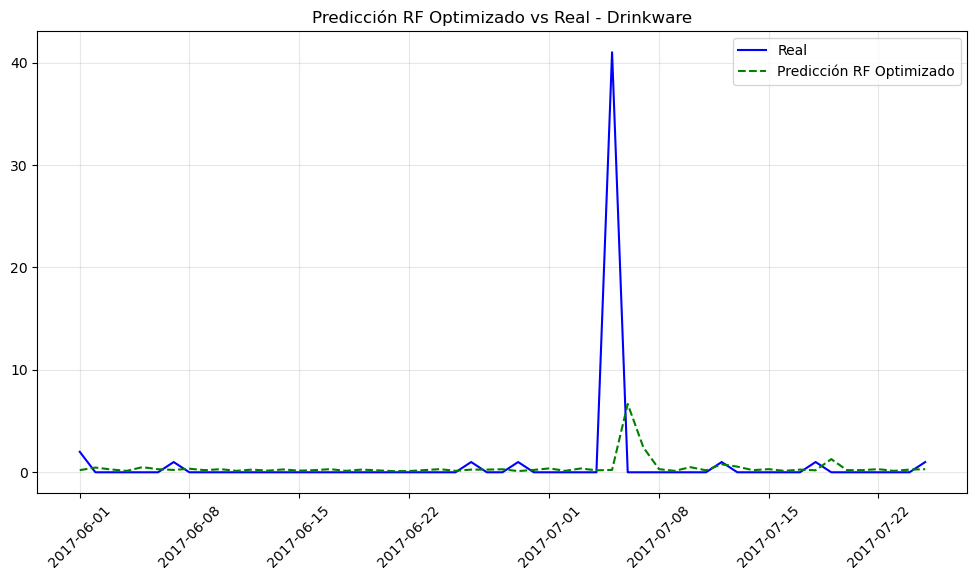

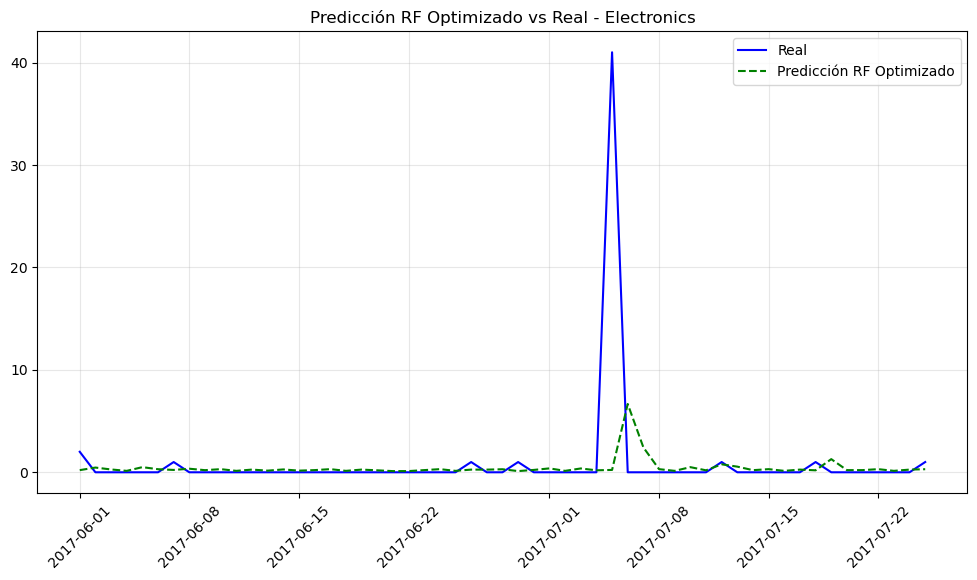

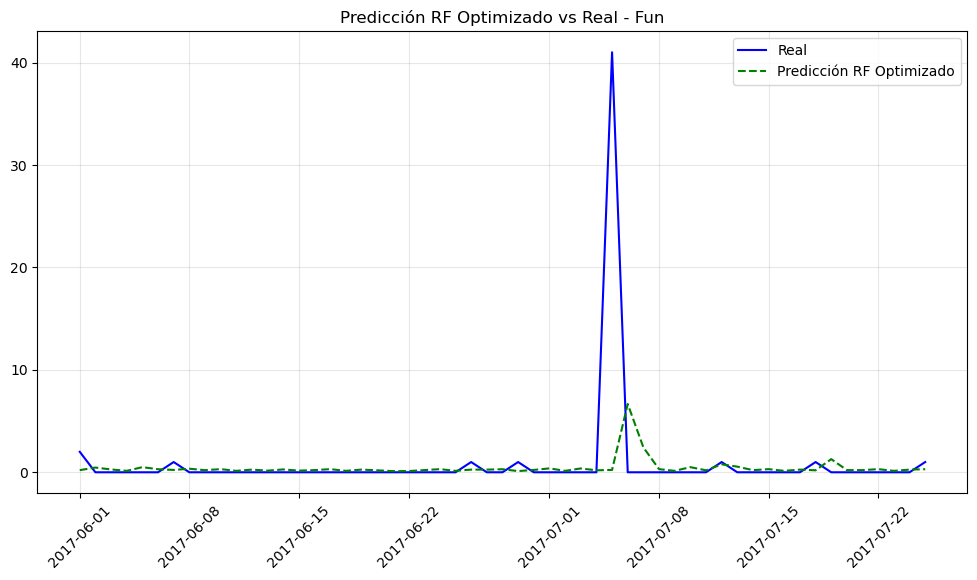

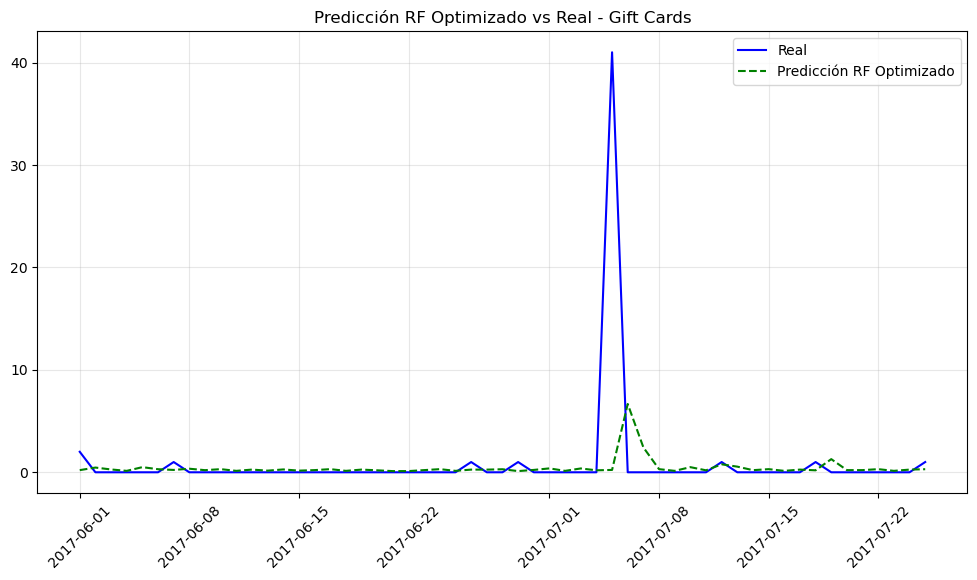

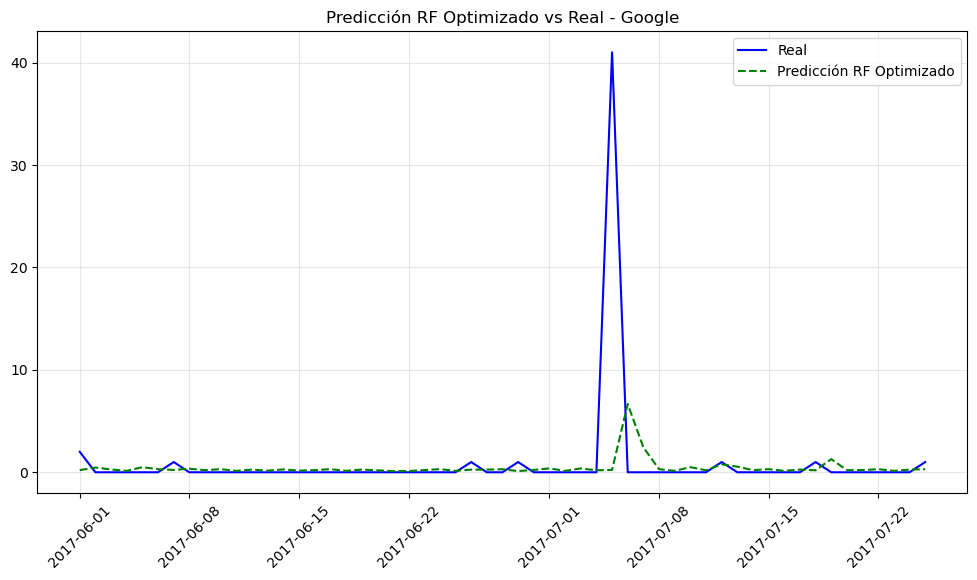

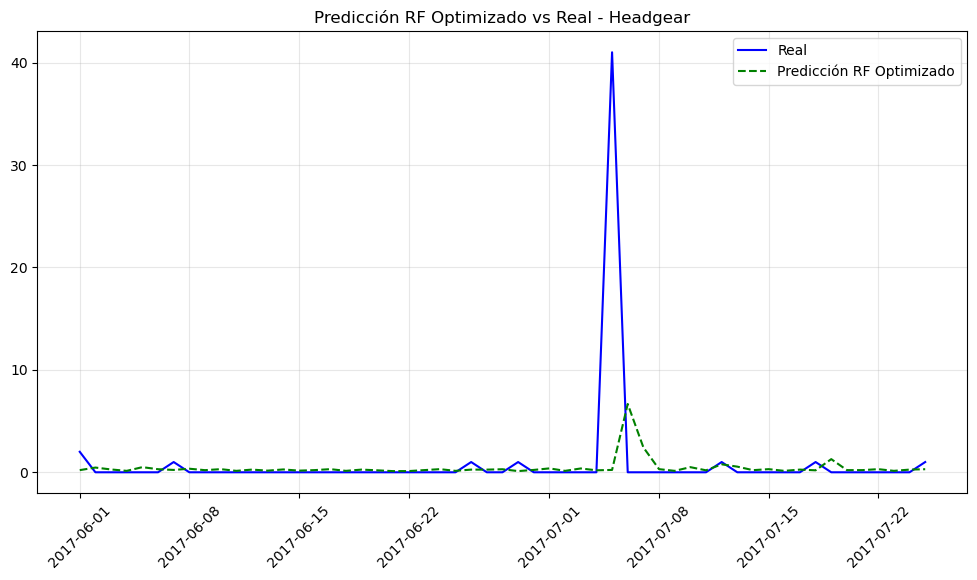

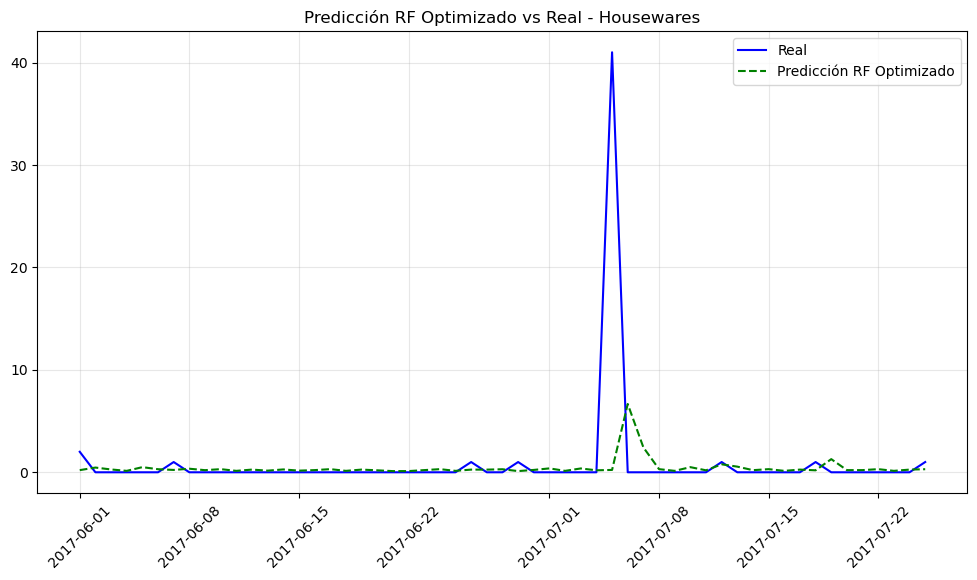

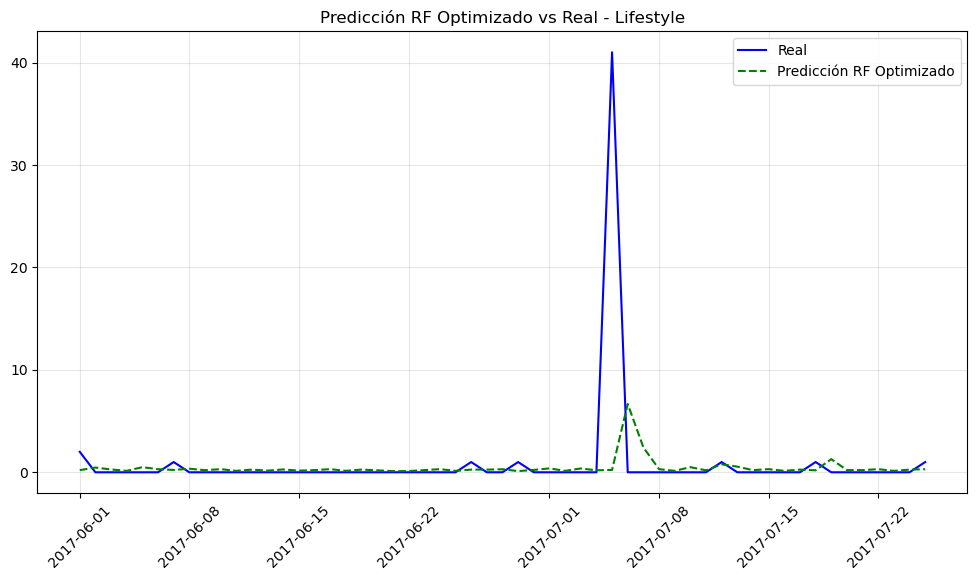

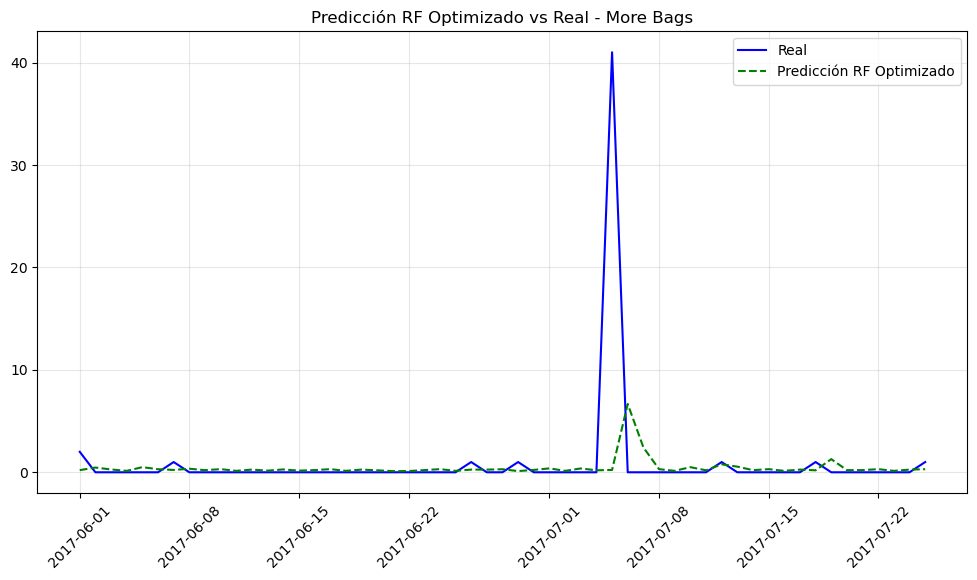

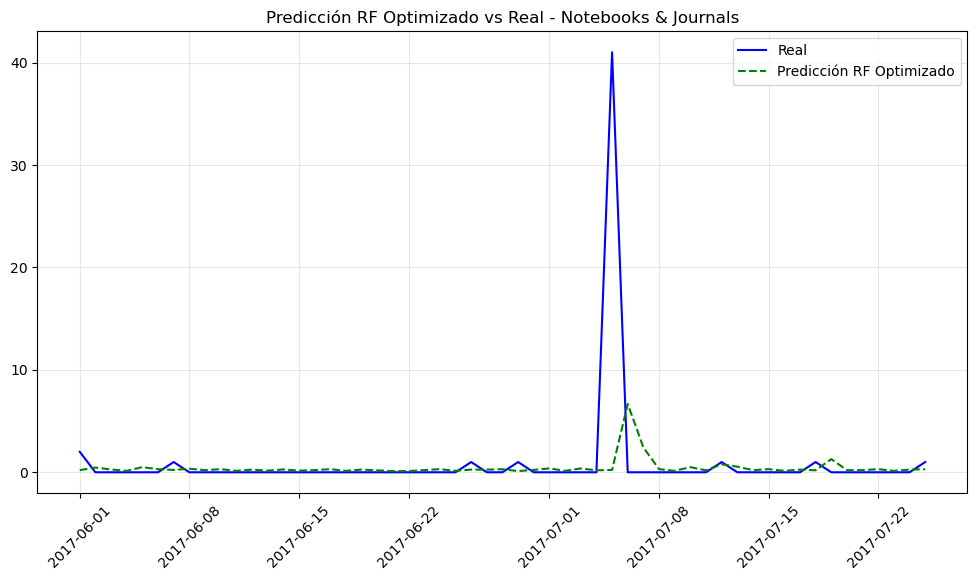

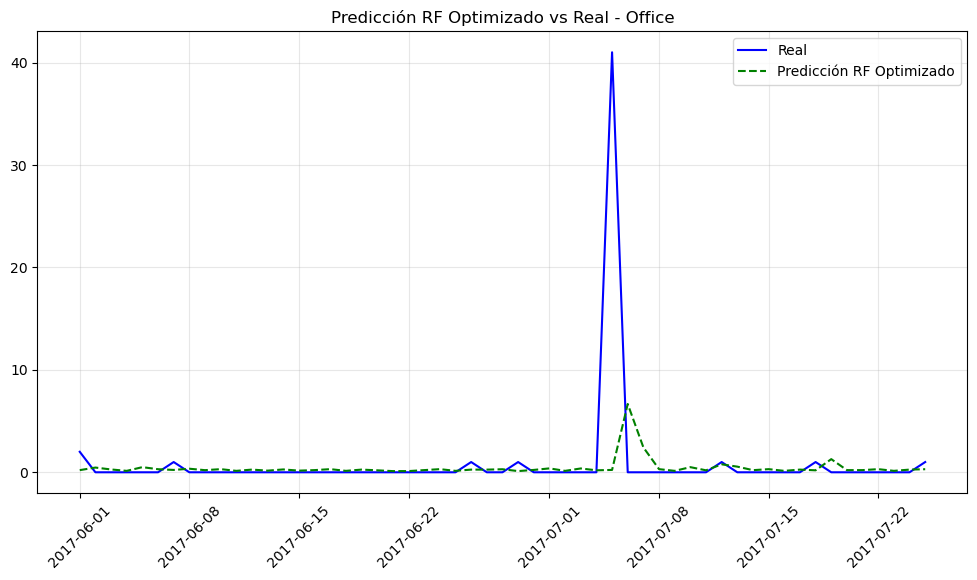

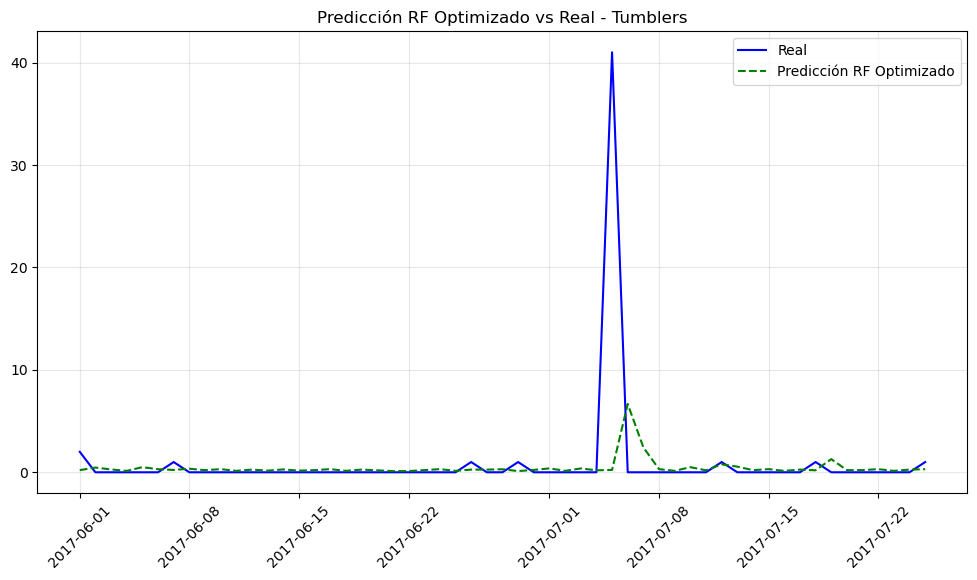

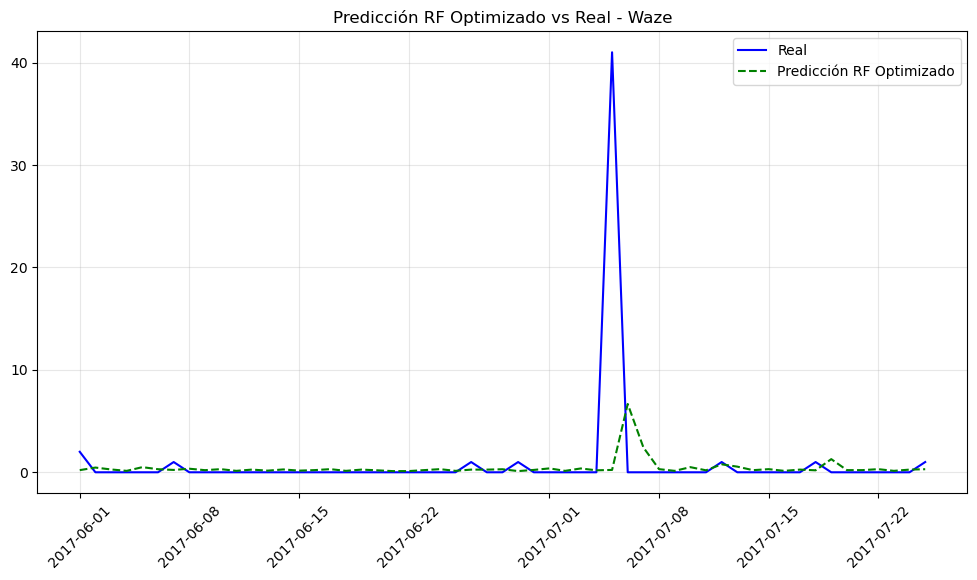

In [35]:
# 📊 Gráfico: Random Forest Optimizado vs Real
for categoria in df["product_category"].unique():
    df_cat = df[df["product_category"] == categoria].copy()
    # ... aquí todo tu preprocesamiento + modelo ...
    plt.figure(figsize=(12,6))
    plt.plot(y_test.index, y_test.values, label="Real", color="blue")
    plt.plot(y_test.index, rf_pred_opt, label="Predicción RF Optimizado", color="green", linestyle="--")
    plt.title(f"Predicción RF Optimizado vs Real - {categoria}")
    plt.xticks(rotation=45)
    plt.legend(); plt.grid(True, alpha=0.3)
    plt.show()


## Modelo Gradient Boosting

In [36]:
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, gb_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_pred))
mape_gb = np.mean(np.abs((y_test - gb_pred) / (y_test + 1))) * 100

print(f'Gradient Boosting - MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}, MAPE: {mape_gb:.2f}%')

Gradient Boosting - MAE: 1.22, RMSE: 5.62, MAPE: 38.83%


## Pruebas gráficas de predicción vs realidad

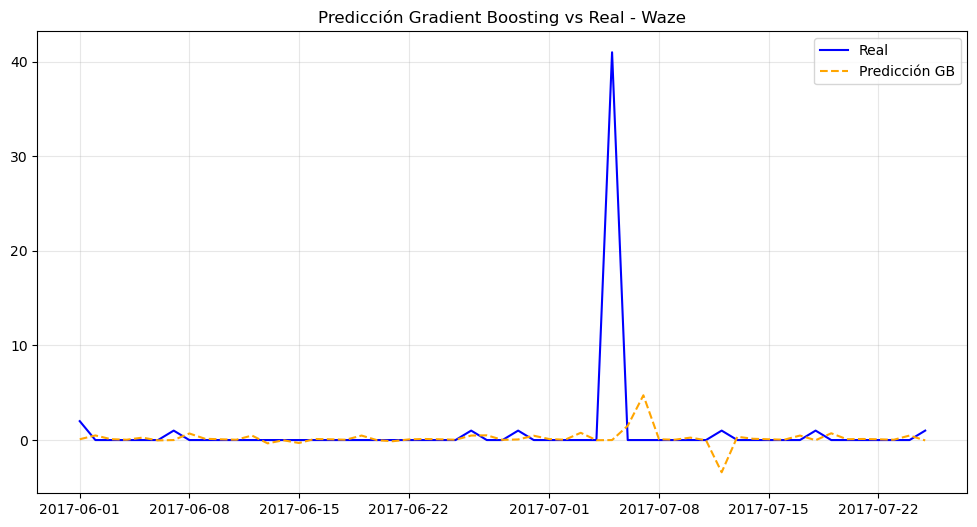

In [37]:
# Gradient Boosting
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Real', color='blue')
plt.plot(y_test.index, gb_pred, label='Predicción GB', color='orange', linestyle='--')
plt.title(f'Predicción Gradient Boosting vs Real - {categoria}')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()

## Optimizando los Hiperparametros

In [38]:
# Gradient Boosting optimizado
param_grid_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 10],
    "subsample": [0.6, 0.8, 1.0]
}

gb_opt = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_grid_gb,
    n_iter=10,
    cv=tscv,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1
)

gb_opt.fit(X_train, y_train)
print("Mejores parámetros GB:", gb_opt.best_params_)

gb_pred_opt = gb_opt.predict(X_test)

mae_gb_opt = mean_absolute_error(y_test, gb_pred_opt)
rmse_gb_opt = np.sqrt(mean_squared_error(y_test, gb_pred_opt))
mape_gb_opt = np.mean(np.abs((y_test - gb_pred_opt) / (y_test + 1))) * 100

print(f"Gradient Boosting OPT - MAE: {mae_gb_opt:.2f}, RMSE: {rmse_gb_opt:.2f}, MAPE: {mape_gb_opt:.2f}%")


Mejores parámetros GB: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}
Gradient Boosting OPT - MAE: 1.19, RMSE: 5.58, MAPE: 38.71%


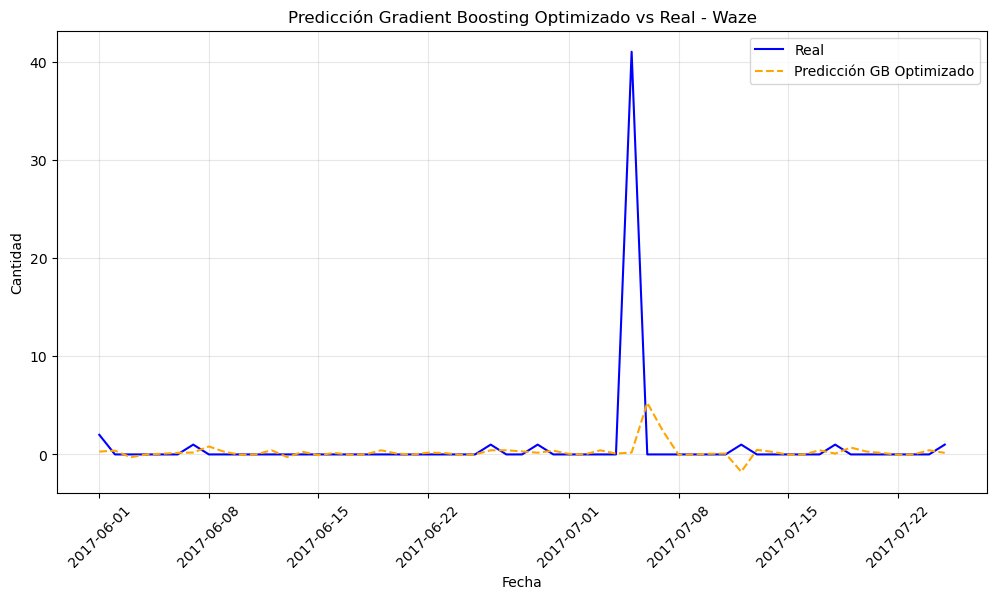

In [39]:
# 📊 Gráfico: Gradient Boosting Optimizado vs Real (con fechas)
plt.figure(figsize=(12,6))

# Serie real con fechas
plt.plot(y_test.index, y_test.values, label='Real', color='blue')

# Serie predicha con las mismas fechas
plt.plot(y_test.index, gb_pred_opt, label='Predicción GB Optimizado', color='orange', linestyle='--')

plt.title(f'Predicción Gradient Boosting Optimizado vs Real - {categoria}')
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Tercer Modelo de Prueba - Deep Learning

In [40]:
#%pip install tensorflow

In [41]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Modelo LSTM (Deep Learning)

In [42]:
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

def create_sequences(data, window_size=14):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i+window_size), 0])
        y.append(data[i+window_size, 0])
    return np.array(X), np.array(y)

window_size = 14
X_seq, y_seq = create_sequences(y_scaled, window_size)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

split = int(len(X_seq)*0.8)
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size,1)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=16, verbose=0)

y_pred_seq = model.predict(X_test_seq)
y_pred = scaler.inverse_transform(y_pred_seq)
y_true = scaler.inverse_transform(y_test_seq.reshape(-1,1))

mae_dl = mean_absolute_error(y_true, y_pred)
rmse_dl = np.sqrt(mean_squared_error(y_true, y_pred))
mape_dl = np.mean(np.abs((y_true - y_pred) / (y_true + 1))) * 100

print(f'LSTM - MAE: {mae_dl:.2f}, RMSE: {rmse_dl:.2f}, MAPE: {mape_dl:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
LSTM - MAE: 1.67, RMSE: 5.72, MAPE: 90.15%


## Pruebas gráficas de predicción vs realidad

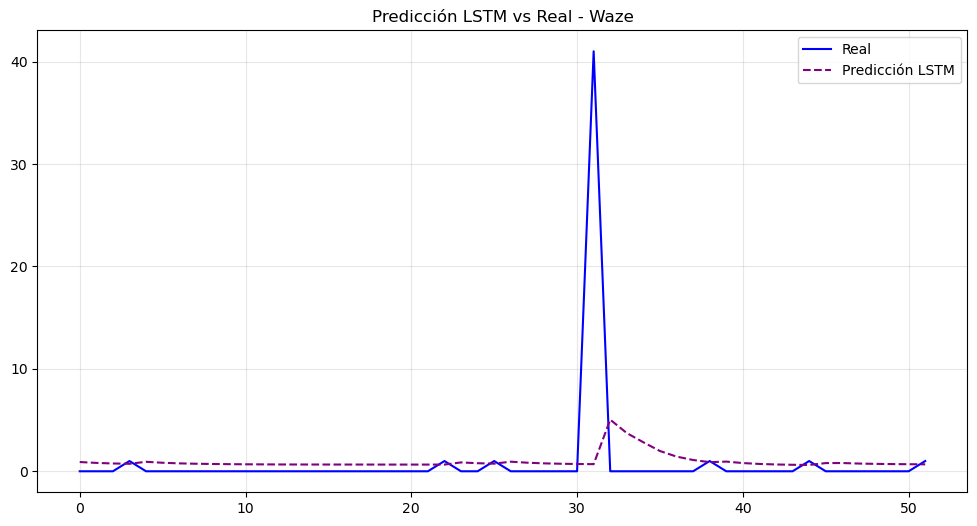

In [43]:
# LSTM
plt.figure(figsize=(12,6))
plt.plot(range(len(y_true)), y_true, label='Real', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicción LSTM', color='purple', linestyle='--')
plt.title(f'Predicción LSTM vs Real - {categoria}')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()

## Optimizando LSTM

In [44]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model_opt = Sequential([
    LSTM(128, return_sequences=True, input_shape=(window_size,1)),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model_opt.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_opt = model_opt.fit(
    X_train_seq, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

y_pred_seq_opt = model_opt.predict(X_test_seq)
y_pred_opt = scaler.inverse_transform(y_pred_seq_opt)
y_true_opt = scaler.inverse_transform(y_test_seq.reshape(-1,1))

mae_dl_opt = mean_absolute_error(y_true_opt, y_pred_opt)
rmse_dl_opt = np.sqrt(mean_squared_error(y_true_opt, y_pred_opt))
mape_dl_opt = np.mean(np.abs((y_true_opt - y_pred_opt) / (y_true_opt + 1))) * 100

print(f"LSTM OPT - MAE: {mae_dl_opt:.2f}, RMSE: {rmse_dl_opt:.2f}, MAPE: {mape_dl_opt:.2f}%")


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0137 - val_loss: 1.3335e-04
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - val_loss: 5.6859e-04
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0094 - val_loss: 2.7224e-04
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - val_loss: 8.5709e-04
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089 - val_loss: 4.3544e-04
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0089 - val_loss: 5.6679e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
LSTM OPT - MAE: 1.26, RMSE: 5.64, MAPE: 46.99%


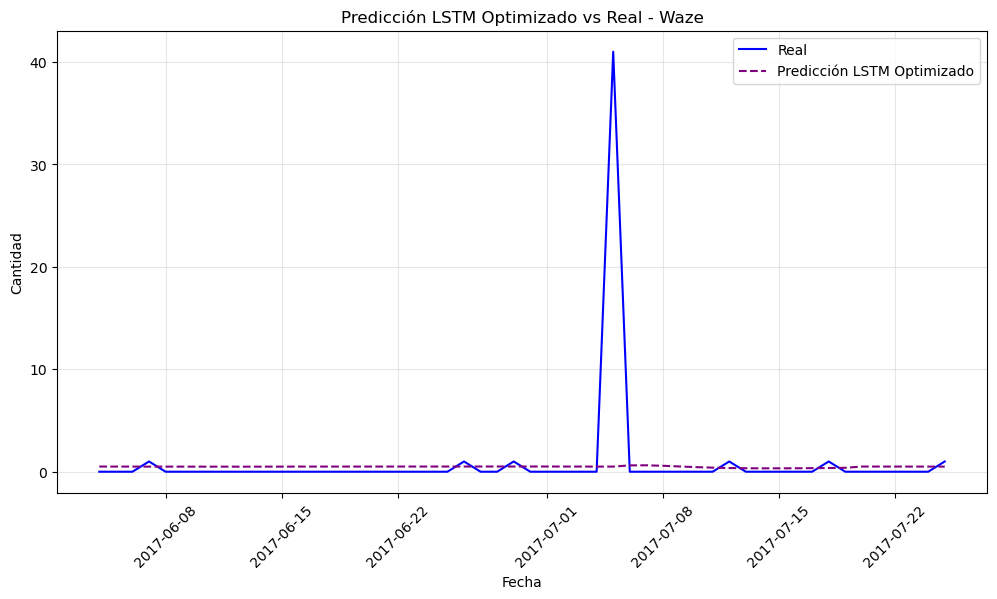

In [45]:
# 📊 Gráfico: LSTM Optimizado vs Real (con fechas)
plt.figure(figsize=(12,6))

# Ajustar el rango de fechas para las predicciones
fechas_test = y_test.index[-len(y_true_opt):]

# Graficar reales y predicciones
plt.plot(fechas_test, y_true_opt, label='Real', color='blue')
plt.plot(fechas_test, y_pred_opt, label='Predicción LSTM Optimizado', color='purple', linestyle='--')

plt.title(f'Predicción LSTM Optimizado vs Real - {categoria}')
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Comparaciones de los modelos visto

# 📊 Comparativa de Modelos Evaluados

A continuación se presentan los resultados obtenidos de los diferentes enfoques aplicados al dataset:

| Modelo                   | MAE  | RMSE | MAPE (%) |
|---------------------------|------|------|----------|
| **ARIMA(22,0,1)**         | 1.45 | 5.32 | 74.89 |
| **ARIMA(22,1,1)**         | 0.95 | 5.38 | 18.35 |
| **ARIMA(21,1,1)**         | 0.95 | 5.38 | 18.47 |
| **ARIMA(21,0,1)**         | 1.44 | 5.32 | 73.72 |
| **ARIMA(0,1,3)**          | 1.05 | 5.36 | 29.90 |
| **Random Forest**         | 1.33 | 5.70 | 55.02 |
| **Random Forest (OPT)**   | 1.24 | 5.60 | 45.68 |
| **Gradient Boosting**     | 1.22 | 5.62 | 38.83 |
| **Gradient Boosting (OPT)** | 1.19 | 5.58 | 38.71 |
| **LSTM**                  | 1.67 | 5.72 | 90.15 |
| **LSTM (OPT)**            | 1.26 | 5.64 | 46.99 |

---

## 🔎 Análisis Comparativo

- **Modelos ARIMA:**  
  - Los más precisos fueron **ARIMA(22,1,1)** y **ARIMA(21,1,1)**, con MAPE ≈ 18%.  
  - Son consistentes y superan a la mayoría de algoritmos de ML/DL en precisión relativa.

- **Machine Learning (RF / GB):**  
  - **Gradient Boosting Optimizado** alcanzó un MAPE ≈ 38.7%, mejor que Random Forest.  
  - Aun así, no logró superar a los mejores ARIMA.

- **Deep Learning (LSTM):**  
  - El modelo **LSTM básico** fue el peor, con MAPE >90%.  
  - La versión **LSTM Optimizada** mejoró hasta 46.9%, pero sigue por debajo de ARIMA y Gradient Boosting.

---

## 🏆 Conclusión

- **Mejor rendimiento global:**  
  Los modelos **ARIMA(22,1,1)** y **ARIMA(21,1,1)** con un MAPE ≈ 18%.  
- **Alternativa en ML:**  
  Si se prioriza escalabilidad y flexibilidad, el **Gradient Boosting Optimizado** es la mejor opción de ML.  
- **Deep Learning:**  
  El **LSTM optimizado** mejoró el rendimiento, pero aún no alcanza la precisión de ARIMA ni GB.

---
